In [5]:
import numpy as np
import pandas as pd
import matplotlib as mp
import matplotlib.pyplot as plt
import seaborn as sns
import re

In [6]:
# 한글화
fm = mp.font_manager.FontManager()
plt.rcParams['font.family'] = 'Malgun Gothic'

# 소년범죄자 범행동기

In [11]:
# 데이터 불러오기
df_young = pd.read_csv('Data/06_소년 범죄자와 일반 범죄자의 범행 동기 차이 분석_김유민_1.csv', encoding='cp949')
df_young.head(10)

,No,자료시점,분류,분류.1,분류.2,계,계.1,계.2,계.3,계.4,...,계.12,계.13,계.14,계.15,계.16,계.17,계.18,계.19,계.20,계.21
0,No,자료시점,분류,분류,분류,계,이욕(소계),이욕(소계),이욕(소계),이욕(소계),...,보복(소계),보복(소계),가정불화,호기심,유혹,우발적,현실불만,부주의,기타,미상
1,No,자료시점,분류,분류,분류,계,이욕(소계),생활비마련,유흥비마련,도박비마련,...,증언,기타,가정불화,호기심,유혹,우발적,현실불만,부주의,기타,미상
2,No,자료시점,분류,분류,분류,원자료,원자료,원자료,원자료,원자료,...,원자료,원자료,원자료,원자료,원자료,원자료,원자료,원자료,원자료,원자료
3,1,2018년,계,계[입력치],계[입력치],"66,142","6,624","2,200","1,064",62,...,0,4,181,"2,941",513,"13,287",246,"2,639","10,662","28,362"
4,2,2018년,형법범,형법범계[입력치],형법범계[입력치],"54,205","6,275","2,082","1,011",62,...,0,4,175,"2,154",410,"12,409",232,590,"8,078","23,269"
5,3,2018년,형법범,재산범죄,재산범죄의 계[입력치],"26,497","5,645","1,969",879,58,...,0,0,23,"1,191",274,"3,481",31,223,"3,207","11,907"
6,4,2018년,형법범,재산범죄,배임,2,0,0,0,0,...,0,0,0,0,0,0,0,0,1,1
7,5,2018년,형법범,재산범죄,사기,"6,968","2,476","1,154",375,55,...,0,0,4,61,24,271,9,95,"1,093","2,771"
8,6,2018년,형법범,재산범죄,손괴,940,8,1,1,0,...,0,0,14,26,0,280,7,19,115,470
9,7,2018년,형법범,재산범죄,장물,290,80,13,1,0,...,0,0,0,4,3,22,0,6,56,111


In [12]:
# 데이터 이름 바꾸기
df_young = df_young.rename(columns={'분류':'대분류', '분류.1':'중분류','분류.2':'소분류','계.2':'생활비 마련','계.3':'유흥비 마련','계.4':'도박비 마련','계.5':'허영사치심','계.6':'치부',
                                   '계.8':'사행심','계.10':'신고·고소','계.11':'수사협조','계.12':'증언','계.14':'가정불화','계.15':'호기심','계.16':'유혹','계.17':'우발적','계.18':'현실불만','계.19':'부주의'})
df_young.head()

,No,자료시점,대분류,중분류,소분류,계,계.1,생활비 마련,유흥비 마련,도박비 마련,...,증언,계.13,가정불화,호기심,유혹,우발적,현실불만,부주의,계.20,계.21
0,No,자료시점,분류,분류,분류,계,이욕(소계),이욕(소계),이욕(소계),이욕(소계),...,보복(소계),보복(소계),가정불화,호기심,유혹,우발적,현실불만,부주의,기타,미상
1,No,자료시점,분류,분류,분류,계,이욕(소계),생활비마련,유흥비마련,도박비마련,...,증언,기타,가정불화,호기심,유혹,우발적,현실불만,부주의,기타,미상
2,No,자료시점,분류,분류,분류,원자료,원자료,원자료,원자료,원자료,...,원자료,원자료,원자료,원자료,원자료,원자료,원자료,원자료,원자료,원자료
3,1,2018년,계,계[입력치],계[입력치],"66,142","6,624","2,200","1,064",62,...,0,4,181,"2,941",513,"13,287",246,"2,639","10,662","28,362"
4,2,2018년,형법범,형법범계[입력치],형법범계[입력치],"54,205","6,275","2,082","1,011",62,...,0,4,175,"2,154",410,"12,409",232,590,"8,078","23,269"


In [13]:
# 필요없는 합계 데이터 제거
df_young = df_young.drop(['No','자료시점','계','계.1','계.7','계.9','계.13','계.20','계.21'], axis='columns')
df_young.head()

,대분류,중분류,소분류,생활비 마련,유흥비 마련,도박비 마련,허영사치심,치부,사행심,신고·고소,수사협조,증언,가정불화,호기심,유혹,우발적,현실불만,부주의
0,분류,분류,분류,이욕(소계),이욕(소계),이욕(소계),이욕(소계),이욕(소계),사행심,보복(소계),보복(소계),보복(소계),가정불화,호기심,유혹,우발적,현실불만,부주의
1,분류,분류,분류,생활비마련,유흥비마련,도박비마련,허영사치심,치부,사행심,신고·고소,수사협조,증언,가정불화,호기심,유혹,우발적,현실불만,부주의
2,분류,분류,분류,원자료,원자료,원자료,원자료,원자료,원자료,원자료,원자료,원자료,원자료,원자료,원자료,원자료,원자료,원자료
3,계,계[입력치],계[입력치],"2,200","1,064",62,55,7,681,1,1,0,181,"2,941",513,"13,287",246,"2,639"
4,형법범,형법범계[입력치],형법범계[입력치],"2,082","1,011",62,50,7,607,1,1,0,175,"2,154",410,"12,409",232,590


In [14]:
# 필요없는 분류 데이터 제거
df_young = df_young[df_young['대분류']!='분류'].copy()
df_young.head()

,대분류,중분류,소분류,생활비 마련,유흥비 마련,도박비 마련,허영사치심,치부,사행심,신고·고소,수사협조,증언,가정불화,호기심,유혹,우발적,현실불만,부주의
3,계,계[입력치],계[입력치],"2,200","1,064",62,55,7,681,1,1,0,181,"2,941",513,"13,287",246,"2,639"
4,형법범,형법범계[입력치],형법범계[입력치],"2,082","1,011",62,50,7,607,1,1,0,175,"2,154",410,"12,409",232,590
5,형법범,재산범죄,재산범죄의 계[입력치],"1,969",879,58,41,0,515,0,0,0,23,"1,191",274,"3,481",31,223
6,형법범,재산범죄,배임,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0
7,형법범,재산범죄,사기,"1,154",375,55,9,0,164,0,0,0,4,61,24,271,9,95


### 형법범

In [15]:
# 대분류가 형법범인 데이터만 가져오기
df_young_criminal = df_young[df_young['대분류']=='형법범']
df_young_criminal.head()

,대분류,중분류,소분류,생활비 마련,유흥비 마련,도박비 마련,허영사치심,치부,사행심,신고·고소,수사협조,증언,가정불화,호기심,유혹,우발적,현실불만,부주의
4,형법범,형법범계[입력치],형법범계[입력치],"2,082","1,011",62,50,7,607,1,1,0,175,"2,154",410,"12,409",232,590
5,형법범,재산범죄,재산범죄의 계[입력치],"1,969",879,58,41,0,515,0,0,0,23,"1,191",274,"3,481",31,223
6,형법범,재산범죄,배임,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0
7,형법범,재산범죄,사기,"1,154",375,55,9,0,164,0,0,0,4,61,24,271,9,95
8,형법범,재산범죄,손괴,1,1,0,0,0,1,0,0,0,14,26,0,280,7,19


In [16]:
# 필요없는 합계 데이터 제거
df_young_criminal = df_young_criminal[df_young_criminal['중분류']!='형법범계[입력치]']
df_young_criminal

,대분류,중분류,소분류,생활비 마련,유흥비 마련,도박비 마련,허영사치심,치부,사행심,신고·고소,수사협조,증언,가정불화,호기심,유혹,우발적,현실불만,부주의
5,형법범,재산범죄,재산범죄의 계[입력치],"1,969",879,58,41,0,515,0,0,0,23,"1,191",274,"3,481",31,223
6,형법범,재산범죄,배임,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0
7,형법범,재산범죄,사기,"1,154",375,55,9,0,164,0,0,0,4,61,24,271,9,95
8,형법범,재산범죄,손괴,1,1,0,0,0,1,0,0,0,14,26,0,280,7,19
9,형법범,재산범죄,장물,13,1,0,1,0,8,0,0,0,0,4,3,22,0,6
10,형법범,재산범죄,절도,779,500,3,31,0,310,0,0,0,5,"1,000",224,"2,687",13,75
11,형법범,재산범죄,횡령,22,2,0,0,0,32,0,0,0,0,100,23,221,2,28
12,형법범,강력범죄(흉악),강력범죄(흉악)의 계[입력치],31,28,0,0,1,13,1,0,0,3,620,83,992,8,41
13,형법범,강력범죄(흉악),강도,31,24,0,0,0,1,0,0,0,1,1,4,37,1,0
14,형법범,강력범죄(흉악),방화,0,0,0,0,0,0,0,0,0,1,9,0,28,1,1


In [17]:
# 각 중분류별 합계 데이터만 가져오기
df_criminal_total = df_young_criminal.loc[[5,12,17,26,31,36,40,44],:]
df_criminal_total

,대분류,중분류,소분류,생활비 마련,유흥비 마련,도박비 마련,허영사치심,치부,사행심,신고·고소,수사협조,증언,가정불화,호기심,유혹,우발적,현실불만,부주의
5,형법범,재산범죄,재산범죄의 계[입력치],"1,969",879,58,41,0,515,0,0,0,23,"1,191",274,"3,481",31,223
12,형법범,강력범죄(흉악),강력범죄(흉악)의 계[입력치],31,28,0,0,1,13,1,0,0,3,620,83,992,8,41
17,형법범,강력범죄(폭력),강력범죄(폭력)의 계[입력치],72,97,0,6,5,44,0,1,0,147,90,19,"7,244",176,163
26,형법범,위조범죄,위조범죄의 계[입력치],9,5,0,0,0,20,0,0,0,0,166,31,142,2,57
31,형법범,공무원범죄,공무원범죄의 계[입력치],0,0,0,0,0,0,0,0,0,0,0,0,0,0,0
36,형법범,풍속범죄,풍속범죄의 계[입력치],0,0,4,0,0,11,0,0,0,0,12,0,35,0,3
40,형법범,과실범죄,과실범죄의 계[입력치],0,0,0,0,0,1,0,0,0,0,7,0,15,0,53
44,형법범,기타형법범죄,기타형법범죄의 계[입력치],1,2,0,3,1,3,0,0,0,2,68,3,500,15,50


In [18]:
# 대분류 없애기
df_criminal_total = df_criminal_total.drop(['대분류'], axis='columns')
df_criminal_total.head()

,중분류,소분류,생활비 마련,유흥비 마련,도박비 마련,허영사치심,치부,사행심,신고·고소,수사협조,증언,가정불화,호기심,유혹,우발적,현실불만,부주의
5,재산범죄,재산범죄의 계[입력치],"1,969",879,58,41,0,515,0,0,0,23,"1,191",274,"3,481",31,223
12,강력범죄(흉악),강력범죄(흉악)의 계[입력치],31,28,0,0,1,13,1,0,0,3,620,83,992,8,41
17,강력범죄(폭력),강력범죄(폭력)의 계[입력치],72,97,0,6,5,44,0,1,0,147,90,19,"7,244",176,163
26,위조범죄,위조범죄의 계[입력치],9,5,0,0,0,20,0,0,0,0,166,31,142,2,57
31,공무원범죄,공무원범죄의 계[입력치],0,0,0,0,0,0,0,0,0,0,0,0,0,0,0


In [19]:
# 중분류를 기준으로 아래로 늘이기
df_young_criminal_m = df_criminal_total.melt(id_vars='중분류')
df_young_criminal_m

,중분류,variable,value
0,재산범죄,소분류,재산범죄의 계[입력치]
1,강력범죄(흉악),소분류,강력범죄(흉악)의 계[입력치]
2,강력범죄(폭력),소분류,강력범죄(폭력)의 계[입력치]
3,위조범죄,소분류,위조범죄의 계[입력치]
4,공무원범죄,소분류,공무원범죄의 계[입력치]
...,...,...,...
123,위조범죄,부주의,57
124,공무원범죄,부주의,0
125,풍속범죄,부주의,3
126,과실범죄,부주의,53


In [20]:
# variable이 소분류인 데이터는 제외하고 가져오기
df_young_criminal_m = df_young_criminal_m[df_young_criminal_m['variable']!='소분류'].copy()
df_young_criminal_m

,중분류,variable,value
8,재산범죄,생활비 마련,"1,969"
9,강력범죄(흉악),생활비 마련,31
10,강력범죄(폭력),생활비 마련,72
11,위조범죄,생활비 마련,9
12,공무원범죄,생활비 마련,0
...,...,...,...
123,위조범죄,부주의,57
124,공무원범죄,부주의,0
125,풍속범죄,부주의,3
126,과실범죄,부주의,53


In [21]:
# variable과 value 이름 바꾸기
df_young_criminal_m = df_young_criminal_m.rename(columns={'variable':'범행동기', 'value':'계'})
df_young_criminal_m.head()

,중분류,범행동기,계
8,재산범죄,생활비 마련,"1,969"
9,강력범죄(흉악),생활비 마련,31
10,강력범죄(폭력),생활비 마련,72
11,위조범죄,생활비 마련,9
12,공무원범죄,생활비 마련,0


In [22]:
# '계' 데이터가 object이면 연산불가
# ','는 공백으로 바꿔주고 int로 타입 변환
df_young_criminal_m['계']=df_young_criminal_m['계'].str.replace(',','')
df_young_criminal_m['계'] = df_young_criminal_m['계'].astype(int)

In [23]:
df_young_criminal_m.info()

<class 'pandas.core.frame.DataFrame'>
Int64Index: 120 entries, 8 to 127
Data columns (total 3 columns):
 #   Column  Non-Null Count  Dtype 
---  ------  --------------  ----- 
 0   중분류     120 non-null    object
 1   범행동기    120 non-null    object
 2   계       120 non-null    int32 
dtypes: int32(1), object(2)
memory usage: 3.3+ KB


<AxesSubplot:xlabel='범행동기'>

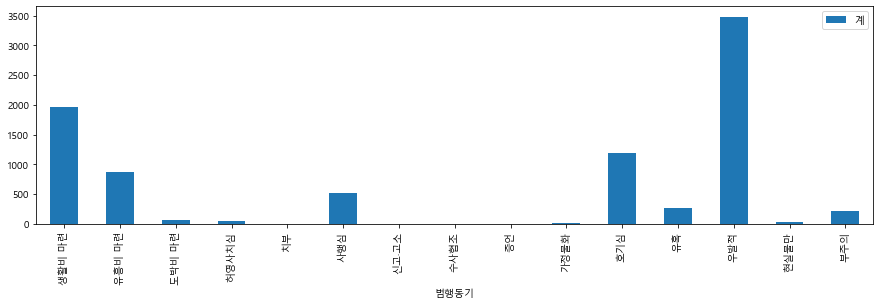

In [24]:
# 재산범죄의 범행동기 막대그래프로 시각화
df_all1 = df_young_criminal_m[df_young_criminal_m['중분류']=='재산범죄']  
df_all1.set_index('범행동기').plot.bar(figsize=(15,4))

**재산범죄**의 범행동기는 우발적, 생활비 마련, 호기심 순서로 높음 

<AxesSubplot:xlabel='범행동기'>

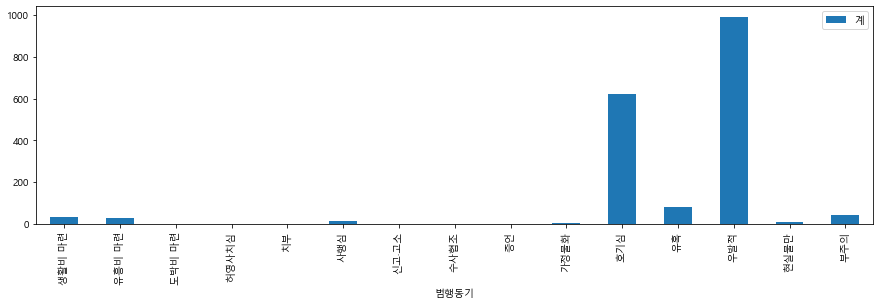

In [25]:
# 강력범죄(흉악)의 범행동기 막대그래프로 시각화
df_all2 = df_young_criminal_m[df_young_criminal_m['중분류']=='강력범죄(흉악)']  
df_all2.set_index('범행동기').plot.bar(figsize=(15,4))

**강력범죄(흉악)**의 범행동기는 우발적, 호기심, 유혹 순서로 높음 

<AxesSubplot:xlabel='범행동기'>

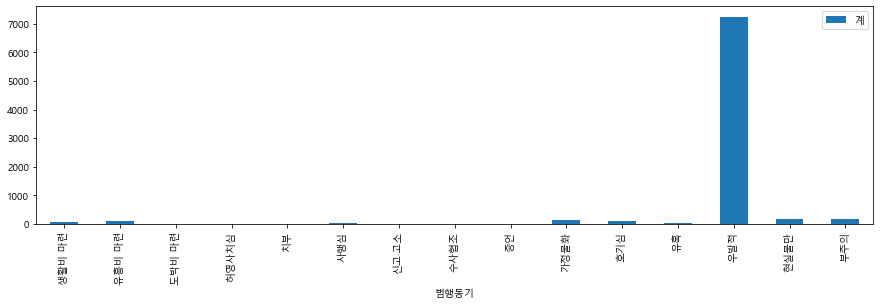

In [26]:
# 강력범죄(폭력)의 범행동기 막대그래프로 시각화
df_all3 = df_young_criminal_m[df_young_criminal_m['중분류']=='강력범죄(폭력)']  
df_all3.set_index('범행동기').plot.bar(figsize=(15,4))

In [27]:
df_all3.sort_values(by='계', ascending=False).groupby('범행동기').head()

,중분류,범행동기,계
106,강력범죄(폭력),우발적,7244
114,강력범죄(폭력),현실불만,176
122,강력범죄(폭력),부주의,163
82,강력범죄(폭력),가정불화,147
18,강력범죄(폭력),유흥비 마련,97
90,강력범죄(폭력),호기심,90
10,강력범죄(폭력),생활비 마련,72
50,강력범죄(폭력),사행심,44
98,강력범죄(폭력),유혹,19
34,강력범죄(폭력),허영사치심,6


**강력범죄(폭력)**의 범행동기는 우발적이 대부분이고 현실불만, 부주의 순서로 높음

<AxesSubplot:xlabel='범행동기'>

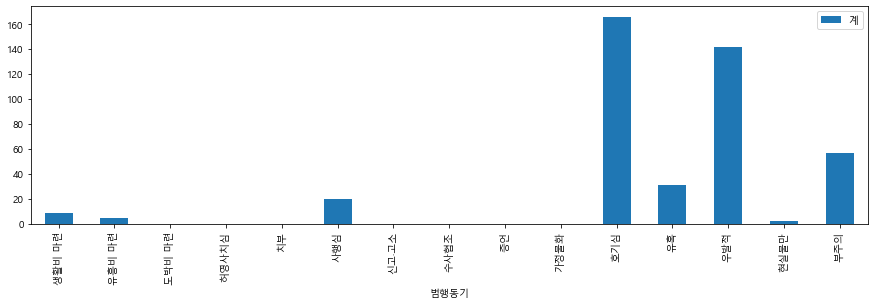

In [28]:
# 위조범죄의 범행동기 막대그래프로 시각화
df_all4 = df_young_criminal_m[df_young_criminal_m['중분류']=='위조범죄']  
df_all4.set_index('범행동기').plot.bar(figsize=(15,4))

**위조범죄**의 범행동기는 호기심, 우발적, 부주의 순서로 높음

<AxesSubplot:xlabel='범행동기'>

C:\Users\user\anaconda3\lib\site-packages\matplotlib\backends\backend_agg.py:238: RuntimeWarning: Glyph 8722 missing from current font.
  font.set_text(s, 0.0, flags=flags)
C:\Users\user\anaconda3\lib\site-packages\matplotlib\backends\backend_agg.py:201: RuntimeWarning: Glyph 8722 missing from current font.
  font.set_text(s, 0, flags=flags)


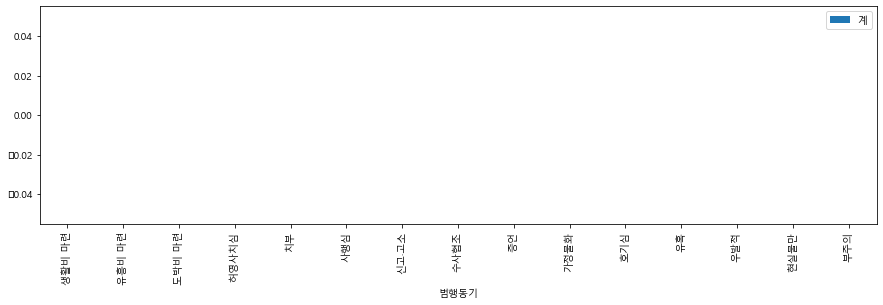

In [29]:
# 공무원범죄의 범행동기 막대그래프로 시각화
df_all5 = df_young_criminal_m[df_young_criminal_m['중분류']=='공무원범죄']  
df_all5.set_index('범행동기').plot.bar(figsize=(15,4))

In [30]:
df_all5.sort_values(by='계', ascending=False).groupby('범행동기').head()

,중분류,범행동기,계
12,공무원범죄,생활비 마련,0
20,공무원범죄,유흥비 마련,0
28,공무원범죄,도박비 마련,0
36,공무원범죄,허영사치심,0
44,공무원범죄,치부,0
52,공무원범죄,사행심,0
60,공무원범죄,신고·고소,0
68,공무원범죄,수사협조,0
76,공무원범죄,증언,0
84,공무원범죄,가정불화,0


**공무원범죄**는 소년 범죄자에게서 일어나지 않음

<AxesSubplot:xlabel='범행동기'>

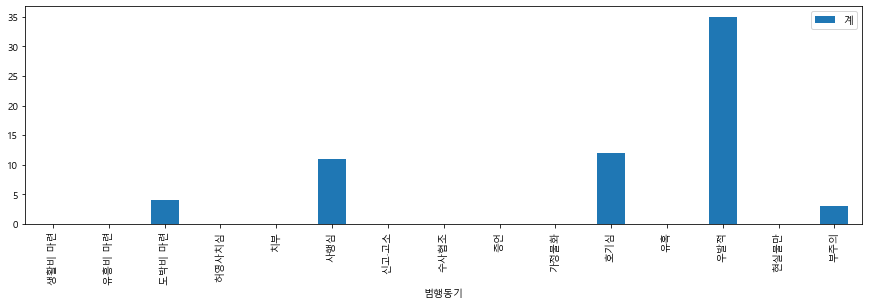

In [31]:
# 풍속범죄의 범행동기 막대그래프로 시각화
df_all6 = df_young_criminal_m[df_young_criminal_m['중분류']=='풍속범죄']  
df_all6.set_index('범행동기').plot.bar(figsize=(15,4))

In [32]:
df_all6.sort_values(by='계', ascending=False).groupby('범행동기').head()

,중분류,범행동기,계
109,풍속범죄,우발적,35
93,풍속범죄,호기심,12
53,풍속범죄,사행심,11
29,풍속범죄,도박비 마련,4
125,풍속범죄,부주의,3
13,풍속범죄,생활비 마련,0
21,풍속범죄,유흥비 마련,0
37,풍속범죄,허영사치심,0
45,풍속범죄,치부,0
61,풍속범죄,신고·고소,0


**풍속범죄**의 범행동기는 우발적, 호기심, 사행심 순서로 높음

<AxesSubplot:xlabel='범행동기'>

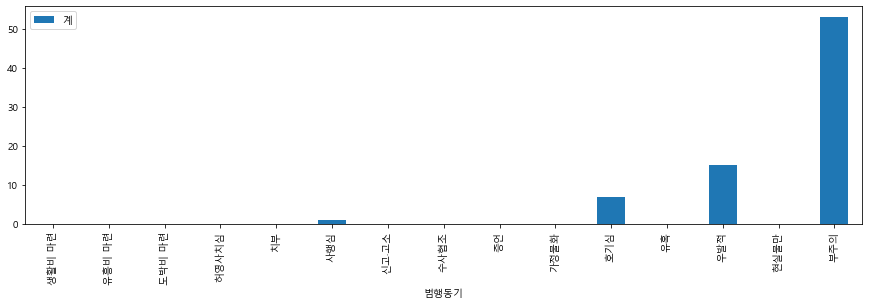

In [33]:
# 과실범죄의 범행동기 막대그래프로 시각화
df_all7 = df_young_criminal_m[df_young_criminal_m['중분류']=='과실범죄']  
df_all7.set_index('범행동기').plot.bar(figsize=(15,4))

**과실범죄**의 범행동기는 부주의, 우발적, 호기심 순서로 높음

<AxesSubplot:xlabel='범행동기'>

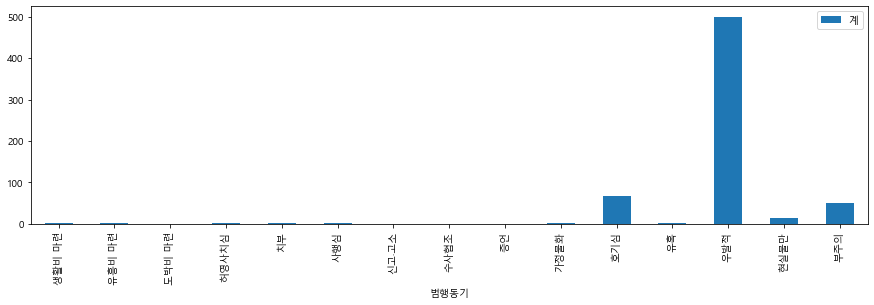

In [34]:
# 기타형법범죄의 범행동기 막대그래프로 시각화
df_all8 = df_young_criminal_m[df_young_criminal_m['중분류']=='기타형법범죄']  
df_all8.set_index('범행동기').plot.bar(figsize=(15,4))

**기타형법범죄**의 범행동기는 우발적, 호기심, 부주의 순서로 높음

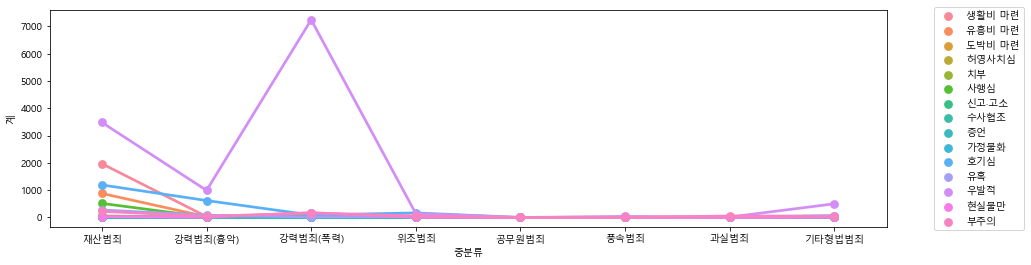

In [35]:
# 중분류 별 범행동기 시각화
plt.figure(figsize=(15,4))
sns.pointplot(data=df_young_criminal_m, x='중분류',y='계', hue='범행동기')

plt.legend(loc='center right', bbox_to_anchor=(1.17, 0.5), ncol=1)

## 재산범죄와 강력범죄 소분류별 분석

In [36]:
# 대분류 제거
df_criminal_total_y = df_young_criminal.drop(['대분류'], axis='columns')
df_criminal_total_y.head()

,중분류,소분류,생활비 마련,유흥비 마련,도박비 마련,허영사치심,치부,사행심,신고·고소,수사협조,증언,가정불화,호기심,유혹,우발적,현실불만,부주의
5,재산범죄,재산범죄의 계[입력치],"1,969",879,58,41,0,515,0,0,0,23,"1,191",274,"3,481",31,223
6,재산범죄,배임,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0
7,재산범죄,사기,"1,154",375,55,9,0,164,0,0,0,4,61,24,271,9,95
8,재산범죄,손괴,1,1,0,0,0,1,0,0,0,14,26,0,280,7,19
9,재산범죄,장물,13,1,0,1,0,8,0,0,0,0,4,3,22,0,6


### 재산 범죄

In [37]:
# 중분류가 재산범죄인 경우만 가져옴
df_criminal_total_pro = df_criminal_total_y[df_criminal_total_y['중분류']=='재산범죄'].copy()

In [38]:
df_criminal_total_pro

,중분류,소분류,생활비 마련,유흥비 마련,도박비 마련,허영사치심,치부,사행심,신고·고소,수사협조,증언,가정불화,호기심,유혹,우발적,현실불만,부주의
5,재산범죄,재산범죄의 계[입력치],"1,969",879,58,41,0,515,0,0,0,23,"1,191",274,"3,481",31,223
6,재산범죄,배임,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0
7,재산범죄,사기,"1,154",375,55,9,0,164,0,0,0,4,61,24,271,9,95
8,재산범죄,손괴,1,1,0,0,0,1,0,0,0,14,26,0,280,7,19
9,재산범죄,장물,13,1,0,1,0,8,0,0,0,0,4,3,22,0,6
10,재산범죄,절도,779,500,3,31,0,310,0,0,0,5,"1,000",224,"2,687",13,75
11,재산범죄,횡령,22,2,0,0,0,32,0,0,0,0,100,23,221,2,28


In [39]:
# 필요없는 합계 데이터 삭제
df_criminal_total_pro = df_criminal_total_pro[df_criminal_total_pro['소분류']!='재산범죄의 계[입력치]']

In [40]:
df_criminal_total_pro

,중분류,소분류,생활비 마련,유흥비 마련,도박비 마련,허영사치심,치부,사행심,신고·고소,수사협조,증언,가정불화,호기심,유혹,우발적,현실불만,부주의
6,재산범죄,배임,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0
7,재산범죄,사기,"1,154",375,55,9,0,164,0,0,0,4,61,24,271,9,95
8,재산범죄,손괴,1,1,0,0,0,1,0,0,0,14,26,0,280,7,19
9,재산범죄,장물,13,1,0,1,0,8,0,0,0,0,4,3,22,0,6
10,재산범죄,절도,779,500,3,31,0,310,0,0,0,5,"1,000",224,"2,687",13,75
11,재산범죄,횡령,22,2,0,0,0,32,0,0,0,0,100,23,221,2,28


In [41]:
# 필요없는 중분류 데이터 삭제
df_criminal_total_pro = df_criminal_total_pro.drop(['중분류'], axis='columns')
df_criminal_total_pro.head()

,소분류,생활비 마련,유흥비 마련,도박비 마련,허영사치심,치부,사행심,신고·고소,수사협조,증언,가정불화,호기심,유혹,우발적,현실불만,부주의
6,배임,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0
7,사기,"1,154",375,55,9,0,164,0,0,0,4,61,24,271,9,95
8,손괴,1,1,0,0,0,1,0,0,0,14,26,0,280,7,19
9,장물,13,1,0,1,0,8,0,0,0,0,4,3,22,0,6
10,절도,779,500,3,31,0,310,0,0,0,5,"1,000",224,"2,687",13,75


In [42]:
# 소분류를 기준으로 아래로 길게 늘이기
df_criminal_total_pro = df_criminal_total_pro.melt(id_vars='소분류')
df_criminal_total_pro

,소분류,variable,value
0,배임,생활비 마련,0
1,사기,생활비 마련,"1,154"
2,손괴,생활비 마련,1
3,장물,생활비 마련,13
4,절도,생활비 마련,779
...,...,...,...
85,사기,부주의,95
86,손괴,부주의,19
87,장물,부주의,6
88,절도,부주의,75


In [43]:
# 이름 바꾸기
df_criminal_total_pro = df_criminal_total_pro.rename(columns={'variable':'범행동기', 'value':'계'})
df_criminal_total_pro.head()

,소분류,범행동기,계
0,배임,생활비 마련,0
1,사기,생활비 마련,"1,154"
2,손괴,생활비 마련,1
3,장물,생활비 마련,13
4,절도,생활비 마련,779


In [44]:
# ','를 공백으로 바꾸고 데이터 타입 변환
df_criminal_total_pro['계'] = df_criminal_total_pro['계'].str.replace(',','')
df_criminal_total_pro['계'] = df_criminal_total_pro['계'].astype(int)

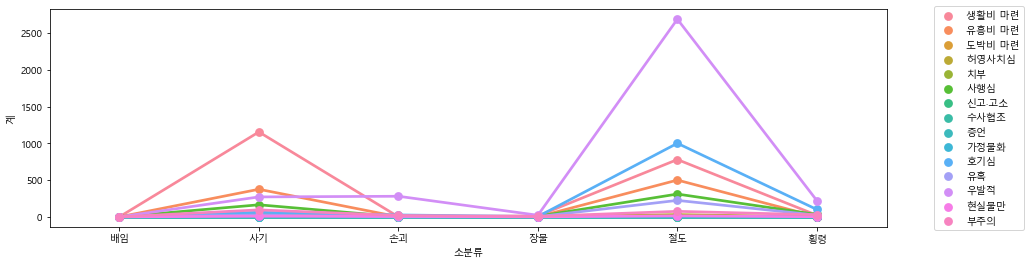

In [45]:
plt.figure(figsize=(15,4))
sns.pointplot(data=df_criminal_total_pro, x='소분류',y='계', hue='범행동기')

plt.legend(loc='center right', bbox_to_anchor=(1.17, 0.5), ncol=1)

**재산범죄**의 소분류 중 사기는 생활비 마련, 손괴와 절도, 횡령은 우발적이 가장 높음

### 강력범죄(흉악)

In [46]:
df_criminal_total_bru = df_criminal_total_y[df_criminal_total_y['중분류']=='강력범죄(흉악)'].copy()
df_criminal_total_bru 

,중분류,소분류,생활비 마련,유흥비 마련,도박비 마련,허영사치심,치부,사행심,신고·고소,수사협조,증언,가정불화,호기심,유혹,우발적,현실불만,부주의
12,강력범죄(흉악),강력범죄(흉악)의 계[입력치],31,28,0,0,1,13,1,0,0,3,620,83,992,8,41
13,강력범죄(흉악),강도,31,24,0,0,0,1,0,0,0,1,1,4,37,1,0
14,강력범죄(흉악),방화,0,0,0,0,0,0,0,0,0,1,9,0,28,1,1
15,강력범죄(흉악),살인,0,0,0,0,0,0,0,0,0,1,0,0,2,2,0
16,강력범죄(흉악),성폭력,0,4,0,0,1,12,1,0,0,0,610,79,925,4,40


In [47]:
df_criminal_total_bru = df_criminal_total_bru[df_criminal_total_bru['소분류']!='강력범죄(흉악)의 계[입력치]']

In [48]:
df_criminal_total_bru = df_criminal_total_bru.drop(['중분류'], axis='columns')

In [49]:
df_criminal_total_bru = df_criminal_total_bru.melt(id_vars='소분류')

In [50]:
df_criminal_total_bru = df_criminal_total_bru.rename(columns={'variable':'범행동기', 'value':'계'})

In [51]:
df_criminal_total_bru['계'] = df_criminal_total_bru['계'].str.replace(',','')
df_criminal_total_bru['계'] = df_criminal_total_bru['계'].astype(int)

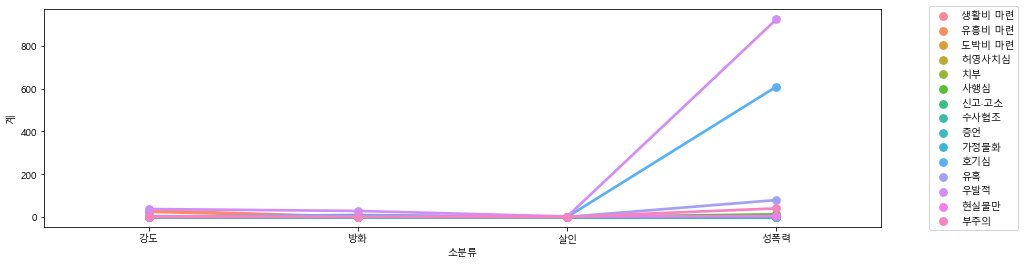

In [52]:
plt.figure(figsize=(15,4))
sns.pointplot(data=df_criminal_total_bru, x='소분류',y='계', hue='범행동기')

plt.legend(loc='center right', bbox_to_anchor=(1.17, 0.5), ncol=1)

**강력범죄(흉악)**은 성폭력이 가장 많이 나타나고 소분류의 대부분이 우발적으로 발생

### 강력범죄(폭력)

In [53]:
df_criminal_total_vio = df_criminal_total_y[df_criminal_total_y['중분류']=='강력범죄(폭력)'].copy()
df_criminal_total_vio

,중분류,소분류,생활비 마련,유흥비 마련,도박비 마련,허영사치심,치부,사행심,신고·고소,수사협조,증언,가정불화,호기심,유혹,우발적,현실불만,부주의
17,강력범죄(폭력),강력범죄(폭력)의 계[입력치],72,97,0,6,5,44,0,1,0,147,90,19,"7,244",176,163
18,강력범죄(폭력),공갈,59,77,0,6,0,32,0,0,0,0,7,17,232,5,6
19,강력범죄(폭력),상해,0,4,0,0,3,2,0,0,0,16,11,0,"2,842",73,70
20,강력범죄(폭력),약취와 유인,1,0,0,0,0,0,0,0,0,0,1,0,4,0,0
21,강력범죄(폭력),체포와 감금,4,10,0,0,0,4,0,0,0,0,2,0,92,0,2
22,강력범죄(폭력),"폭력행위등(단체등의구성,활동)",0,0,0,0,0,0,0,0,0,0,0,0,14,0,0
23,강력범죄(폭력),"폭력행위등(손괴,강요,주거침입등)",1,0,0,0,0,3,0,0,0,1,29,0,88,5,4
24,강력범죄(폭력),폭행,6,6,0,0,2,3,0,1,0,118,28,1,"3,814",91,80
25,강력범죄(폭력),협박,1,0,0,0,0,0,0,0,0,12,12,1,158,2,1


In [54]:
df_criminal_total_vio = df_criminal_total_vio[df_criminal_total_vio['소분류']!='강력범죄(폭력)의 계[입력치]']

In [55]:
df_criminal_total_vio = df_criminal_total_vio.drop(['중분류'], axis='columns')

In [56]:
df_criminal_total_vio = df_criminal_total_vio.melt(id_vars='소분류')

In [57]:
df_criminal_total_vio = df_criminal_total_vio.rename(columns={'variable':'범행동기', 'value':'계'})

In [58]:
df_criminal_total_vio['계'] = df_criminal_total_vio['계'].str.replace(',','')
df_criminal_total_vio['계'] = df_criminal_total_vio['계'].astype(int)

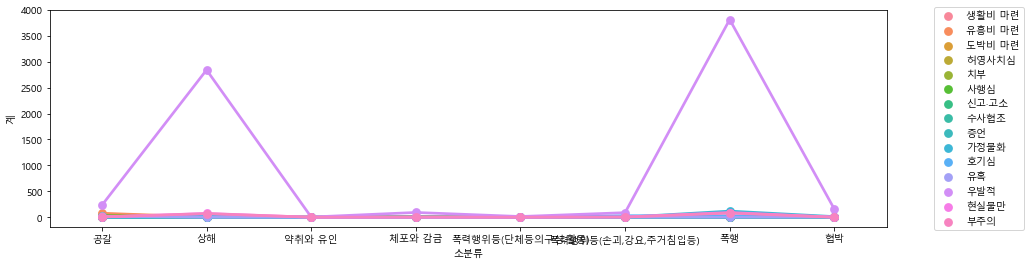

In [59]:
plt.figure(figsize=(15,4))
sns.pointplot(data=df_criminal_total_vio, x='소분류',y='계', hue='범행동기')

plt.legend(loc='center right', bbox_to_anchor=(1.17, 0.5), ncol=1)

**강력범죄(폭력)**의 소분류는 상해와 폭행이 가장 많이 일어나고 대부분이 우발적으로 발생

# 일반범죄자 범행동기

In [70]:
df_adult = pd.read_csv('Data/06_소년 범죄자와 일반 범죄자의 범행 동기 차이 분석_김유민_2.csv', encoding='cp949')
df_adult.head()

,No,자료시점,분류,분류.1,분류.2,계,계.1,계.2,계.3,계.4,...,계.12,계.13,계.14,계.15,계.16,계.17,계.18,계.19,계.20,계.21
0,No,자료시점,분류,분류,분류,계,이욕(소계),이욕(소계),이욕(소계),이욕(소계),...,보복(소계),보복(소계),가정불화,호기심,유혹,우발적,현실불만,부주의,기타,미상
1,No,자료시점,분류,분류,분류,계,이욕(소계),생활비마련,유흥비마련,도박비마련,...,증언,기타,가정불화,호기심,유혹,우발적,현실불만,부주의,기타,미상
2,No,자료시점,분류,분류,분류,원자료,원자료,원자료,원자료,원자료,...,원자료,원자료,원자료,원자료,원자료,원자료,원자료,원자료,원자료,원자료
3,1,2018년,계,계[입력치],계[입력치],"1,749,459","139,967","52,381","3,935","1,890",...,14,191,"20,340","9,418","6,848","262,269","6,004","198,468","395,225","693,485"
4,2,2018년,형법범,형법범계[입력치],형법범계[입력치],"963,276","92,752","32,861","3,727","1,850",...,12,164,"19,057","5,940","3,660","224,084","4,983","23,778","181,080","393,488"


In [71]:
df= df_adult.rename(columns={'분류':'대분류', '분류.1':'중분류','분류.2':'소분류','계.2':'생활비 마련','계.3':'유흥비 마련','계.4':'도박비 마련','계.5':'허영사치심','계.6':'치부',
                                   '계.8':'사행심','계.10':'신고·고소','계.11':'수사협조','계.12':'증언','계.14':'가정불화','계.15':'호기심','계.16':'유혹','계.17':'우발적','계.18':'현실불만','계.19':'부주의'})
df.head()

,No,자료시점,대분류,중분류,소분류,계,계.1,생활비 마련,유흥비 마련,도박비 마련,...,증언,계.13,가정불화,호기심,유혹,우발적,현실불만,부주의,계.20,계.21
0,No,자료시점,분류,분류,분류,계,이욕(소계),이욕(소계),이욕(소계),이욕(소계),...,보복(소계),보복(소계),가정불화,호기심,유혹,우발적,현실불만,부주의,기타,미상
1,No,자료시점,분류,분류,분류,계,이욕(소계),생활비마련,유흥비마련,도박비마련,...,증언,기타,가정불화,호기심,유혹,우발적,현실불만,부주의,기타,미상
2,No,자료시점,분류,분류,분류,원자료,원자료,원자료,원자료,원자료,...,원자료,원자료,원자료,원자료,원자료,원자료,원자료,원자료,원자료,원자료
3,1,2018년,계,계[입력치],계[입력치],"1,749,459","139,967","52,381","3,935","1,890",...,14,191,"20,340","9,418","6,848","262,269","6,004","198,468","395,225","693,485"
4,2,2018년,형법범,형법범계[입력치],형법범계[입력치],"963,276","92,752","32,861","3,727","1,850",...,12,164,"19,057","5,940","3,660","224,084","4,983","23,778","181,080","393,488"


In [72]:
df = df.drop(['No','자료시점','계','계.1','계.7','계.9','계.13','계.20','계.21'], axis='columns')
df.head()

,대분류,중분류,소분류,생활비 마련,유흥비 마련,도박비 마련,허영사치심,치부,사행심,신고·고소,수사협조,증언,가정불화,호기심,유혹,우발적,현실불만,부주의
0,분류,분류,분류,이욕(소계),이욕(소계),이욕(소계),이욕(소계),이욕(소계),사행심,보복(소계),보복(소계),보복(소계),가정불화,호기심,유혹,우발적,현실불만,부주의
1,분류,분류,분류,생활비마련,유흥비마련,도박비마련,허영사치심,치부,사행심,신고·고소,수사협조,증언,가정불화,호기심,유혹,우발적,현실불만,부주의
2,분류,분류,분류,원자료,원자료,원자료,원자료,원자료,원자료,원자료,원자료,원자료,원자료,원자료,원자료,원자료,원자료,원자료
3,계,계[입력치],계[입력치],"52,381","3,935","1,890",367,"1,274","17,074",148,8,14,"20,340","9,418","6,848","262,269","6,004","198,468"
4,형법범,형법범계[입력치],형법범계[입력치],"32,861","3,727","1,850",297,530,"14,154",117,7,12,"19,057","5,940","3,660","224,084","4,983","23,778"


In [73]:
df = df[df['대분류']!='분류'].copy()
df.head()

,대분류,중분류,소분류,생활비 마련,유흥비 마련,도박비 마련,허영사치심,치부,사행심,신고·고소,수사협조,증언,가정불화,호기심,유혹,우발적,현실불만,부주의
3,계,계[입력치],계[입력치],"52,381","3,935","1,890",367,"1,274","17,074",148,8,14,"20,340","9,418","6,848","262,269","6,004","198,468"
4,형법범,형법범계[입력치],형법범계[입력치],"32,861","3,727","1,850",297,530,"14,154",117,7,12,"19,057","5,940","3,660","224,084","4,983","23,778"
5,형법범,재산범죄,재산범죄의 계[입력치],"30,679","3,214","1,650",243,435,"6,059",8,1,0,"1,797","2,047","2,105","58,050",968,"11,702"
6,형법범,재산범죄,배임,176,5,7,2,8,45,0,0,0,0,3,14,62,1,214
7,형법범,재산범죄,사기,"20,571","1,899","1,407",140,341,"3,723",6,1,0,28,291,608,"5,987",136,"6,019"


In [74]:
df_criminal = df[df['대분류']=='형법범']
df_criminal.head()

,대분류,중분류,소분류,생활비 마련,유흥비 마련,도박비 마련,허영사치심,치부,사행심,신고·고소,수사협조,증언,가정불화,호기심,유혹,우발적,현실불만,부주의
4,형법범,형법범계[입력치],형법범계[입력치],"32,861","3,727","1,850",297,530,"14,154",117,7,12,"19,057","5,940","3,660","224,084","4,983","23,778"
5,형법범,재산범죄,재산범죄의 계[입력치],"30,679","3,214","1,650",243,435,"6,059",8,1,0,"1,797","2,047","2,105","58,050",968,"11,702"
6,형법범,재산범죄,배임,176,5,7,2,8,45,0,0,0,0,3,14,62,1,214
7,형법범,재산범죄,사기,"20,571","1,899","1,407",140,341,"3,723",6,1,0,28,291,608,"5,987",136,"6,019"
8,형법범,재산범죄,손괴,11,2,2,1,2,28,2,0,0,"1,732",57,10,"17,534",625,934


In [75]:
df_criminal = df_criminal[df_criminal['중분류']!='형법범계[입력치]']
df_criminal

,대분류,중분류,소분류,생활비 마련,유흥비 마련,도박비 마련,허영사치심,치부,사행심,신고·고소,수사협조,증언,가정불화,호기심,유혹,우발적,현실불만,부주의
5,형법범,재산범죄,재산범죄의 계[입력치],"30,679","3,214","1,650",243,435,"6,059",8,1,0,"1,797","2,047","2,105","58,050",968,"11,702"
6,형법범,재산범죄,배임,176,5,7,2,8,45,0,0,0,0,3,14,62,1,214
7,형법범,재산범죄,사기,"20,571","1,899","1,407",140,341,"3,723",6,1,0,28,291,608,"5,987",136,"6,019"
8,형법범,재산범죄,손괴,11,2,2,1,2,28,2,0,0,"1,732",57,10,"17,534",625,934
9,형법범,재산범죄,장물,168,10,2,1,1,48,0,0,0,0,6,14,171,1,285
10,형법범,재산범죄,절도,"8,280","1,190",156,85,36,"1,730",0,0,0,29,"1,440","1,254","29,734",185,"3,127"
11,형법범,재산범죄,횡령,"1,473",108,76,14,47,485,0,0,0,8,250,205,"4,562",20,"1,123"
12,형법범,강력범죄(흉악),강력범죄(흉악)의 계[입력치],263,74,13,1,13,86,4,1,0,224,"2,711",995,"12,280",254,778
13,형법범,강력범죄(흉악),강도,217,64,12,0,0,22,1,0,0,2,5,13,241,11,4
14,형법범,강력범죄(흉악),방화,2,0,0,0,0,0,0,0,0,69,23,2,631,109,18


In [76]:
df_criminal = df_criminal.drop(['대분류'], axis='columns')
df_criminal.head()

,중분류,소분류,생활비 마련,유흥비 마련,도박비 마련,허영사치심,치부,사행심,신고·고소,수사협조,증언,가정불화,호기심,유혹,우발적,현실불만,부주의
5,재산범죄,재산범죄의 계[입력치],"30,679","3,214","1,650",243,435,"6,059",8,1,0,"1,797","2,047","2,105","58,050",968,"11,702"
6,재산범죄,배임,176,5,7,2,8,45,0,0,0,0,3,14,62,1,214
7,재산범죄,사기,"20,571","1,899","1,407",140,341,"3,723",6,1,0,28,291,608,"5,987",136,"6,019"
8,재산범죄,손괴,11,2,2,1,2,28,2,0,0,"1,732",57,10,"17,534",625,934
9,재산범죄,장물,168,10,2,1,1,48,0,0,0,0,6,14,171,1,285


In [77]:
df_total = df_criminal.loc[[5,12,17,26,31,36,40,44],:]
df_total

,중분류,소분류,생활비 마련,유흥비 마련,도박비 마련,허영사치심,치부,사행심,신고·고소,수사협조,증언,가정불화,호기심,유혹,우발적,현실불만,부주의
5,재산범죄,재산범죄의 계[입력치],"30,679","3,214","1,650",243,435,"6,059",8,1,0,"1,797","2,047","2,105","58,050",968,"11,702"
12,강력범죄(흉악),강력범죄(흉악)의 계[입력치],263,74,13,1,13,86,4,1,0,224,"2,711",995,"12,280",254,778
17,강력범죄(폭력),강력범죄(폭력)의 계[입력치],441,203,12,12,22,201,77,3,3,"16,657",203,141,"122,036","2,137","2,426"
26,위조범죄,위조범죄의 계[입력치],345,22,8,6,16,262,0,0,0,8,182,63,388,7,712
31,공무원범죄,공무원범죄의 계[입력치],19,3,1,0,5,12,0,0,0,1,4,6,59,0,164
36,풍속범죄,풍속범죄의 계[입력치],338,187,117,15,11,"7,349",0,0,0,3,541,261,"2,230",35,440
40,과실범죄,과실범죄의 계[입력치],2,0,0,0,0,1,0,0,0,21,7,0,559,10,"4,745"
44,기타형법범죄,기타형법범죄의 계[입력치],774,24,49,20,28,184,28,2,9,346,245,89,"28,482","1,572","2,811"


In [78]:
df_criminal_m = df_total.melt(id_vars='중분류')
df_criminal_m

,중분류,variable,value
0,재산범죄,소분류,재산범죄의 계[입력치]
1,강력범죄(흉악),소분류,강력범죄(흉악)의 계[입력치]
2,강력범죄(폭력),소분류,강력범죄(폭력)의 계[입력치]
3,위조범죄,소분류,위조범죄의 계[입력치]
4,공무원범죄,소분류,공무원범죄의 계[입력치]
...,...,...,...
123,위조범죄,부주의,712
124,공무원범죄,부주의,164
125,풍속범죄,부주의,440
126,과실범죄,부주의,"4,745"


In [79]:
df_criminal_m = df_criminal_m[df_criminal_m['variable']!='소분류'].copy()
df_criminal_m

,중분류,variable,value
8,재산범죄,생활비 마련,"30,679"
9,강력범죄(흉악),생활비 마련,263
10,강력범죄(폭력),생활비 마련,441
11,위조범죄,생활비 마련,345
12,공무원범죄,생활비 마련,19
...,...,...,...
123,위조범죄,부주의,712
124,공무원범죄,부주의,164
125,풍속범죄,부주의,440
126,과실범죄,부주의,"4,745"


In [80]:
df_criminal_m = df_criminal_m.rename(columns={'variable':'범행동기', 'value':'계'})
df_criminal_m.head()

,중분류,범행동기,계
8,재산범죄,생활비 마련,"30,679"
9,강력범죄(흉악),생활비 마련,263
10,강력범죄(폭력),생활비 마련,441
11,위조범죄,생활비 마련,345
12,공무원범죄,생활비 마련,19


In [81]:
df_criminal_m['계']=df_criminal_m['계'].str.replace(',','')
df_criminal_m['계'] = df_criminal_m['계'].astype(int)

In [82]:
df_criminal_m.info()

<class 'pandas.core.frame.DataFrame'>
Int64Index: 120 entries, 8 to 127
Data columns (total 3 columns):
 #   Column  Non-Null Count  Dtype 
---  ------  --------------  ----- 
 0   중분류     120 non-null    object
 1   범행동기    120 non-null    object
 2   계       120 non-null    int32 
dtypes: int32(1), object(2)
memory usage: 3.3+ KB


<ipython-input-83-b8699903fd35>:3: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  df_all_a1['계'] = df_all_a1['계'] - df_all1['계']


<AxesSubplot:xlabel='범행동기'>

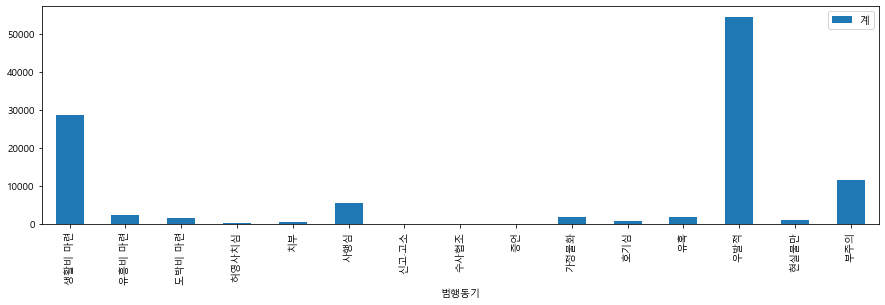

In [83]:
# 소년범죄자의 범행동기와 달리 일반범죄자는 소년 범죄자도 포함되어있으므로 '계' 값을 빼줌
df_all_a1 = df_criminal_m[df_criminal_m['중분류']=='재산범죄'] 
df_all_a1['계'] = df_all_a1['계'] - df_all1['계']
df_all_a1.set_index('범행동기').plot.bar(figsize=(15,4))

**재산범죄**의 경우 우발적, 생활비 마련, 부주의 순서로 높음

<ipython-input-84-019d391b9dc3>:2: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  df_all_a2['계'] = df_all_a2['계'] - df_all2['계']


<AxesSubplot:xlabel='범행동기'>

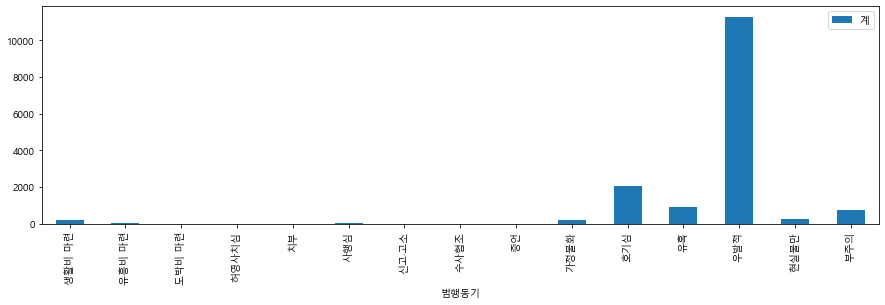

In [84]:
df_all_a2 = df_criminal_m[df_criminal_m['중분류']=='강력범죄(흉악)']  
df_all_a2['계'] = df_all_a2['계'] - df_all2['계']
df_all_a2.set_index('범행동기').plot.bar(figsize=(15,4))

**강력범죄(흉악)**의 경우 우발적, 호기심, 유혹 순서로 높음

<ipython-input-85-f86fdc32b3bd>:2: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  df_all_a3['계'] = df_all_a3['계'] - df_all3['계']


<AxesSubplot:xlabel='범행동기'>

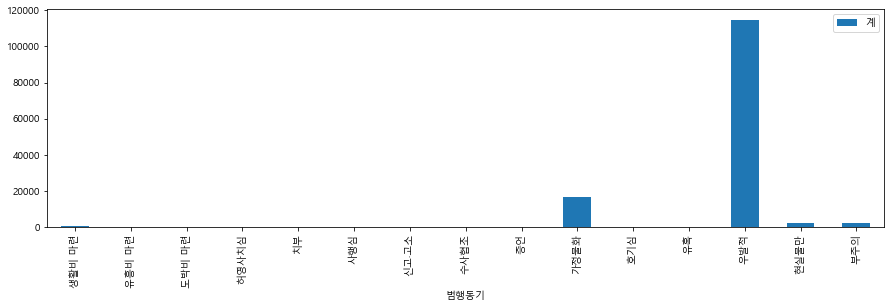

In [85]:
df_all_a3 = df_criminal_m[df_criminal_m['중분류']=='강력범죄(폭력)']
df_all_a3['계'] = df_all_a3['계'] - df_all3['계']
df_all_a3.set_index('범행동기').plot.bar(figsize=(15,4))

In [86]:
df_all_a3.sort_values(by='계', ascending=False).groupby('범행동기').head()

,중분류,범행동기,계
106,강력범죄(폭력),우발적,114792
82,강력범죄(폭력),가정불화,16510
122,강력범죄(폭력),부주의,2263
114,강력범죄(폭력),현실불만,1961
10,강력범죄(폭력),생활비 마련,369
50,강력범죄(폭력),사행심,157
98,강력범죄(폭력),유혹,122
90,강력범죄(폭력),호기심,113
18,강력범죄(폭력),유흥비 마련,106
58,강력범죄(폭력),신고·고소,77


**강력범죄(폭력)**의 경우 우발적, 가정불화, 부주의 순서로 높음

<ipython-input-87-c0b10f19bc24>:2: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  df_all_a4['계'] = df_all_a4['계'] - df_all4['계']


<AxesSubplot:xlabel='범행동기'>

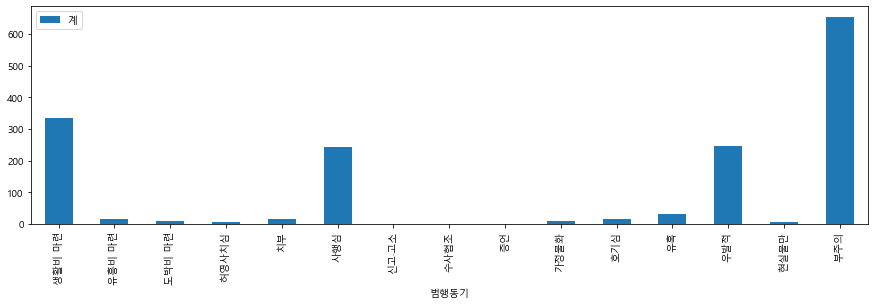

In [87]:
df_all_a4 = df_criminal_m[df_criminal_m['중분류']=='위조범죄'] 
df_all_a4['계'] = df_all_a4['계'] - df_all4['계']
df_all_a4.set_index('범행동기').plot.bar(figsize=(15,4))

In [88]:
df_all_a4.sort_values(by='계', ascending=False).groupby('범행동기').head()

,중분류,범행동기,계
123,위조범죄,부주의,655
11,위조범죄,생활비 마련,336
107,위조범죄,우발적,246
51,위조범죄,사행심,242
99,위조범죄,유혹,32
19,위조범죄,유흥비 마련,17
43,위조범죄,치부,16
91,위조범죄,호기심,16
27,위조범죄,도박비 마련,8
83,위조범죄,가정불화,8


**위조범죄**의 경우 부주의, 생활비 마련, 우발적 순서로 높음

<ipython-input-89-cbee2a7b7984>:2: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  df_all_a5['계'] = df_all_a5['계'] - df_all5['계']


<AxesSubplot:xlabel='범행동기'>

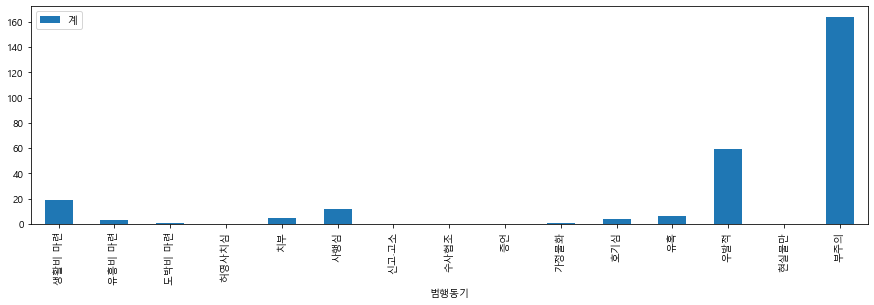

In [89]:
df_all_a5 = df_criminal_m[df_criminal_m['중분류']=='공무원범죄'] 
df_all_a5['계'] = df_all_a5['계'] - df_all5['계']
df_all_a5.set_index('범행동기').plot.bar(figsize=(15,4))

**공무원범죄**의 경우 부주의, 우발적, 생활비 마련 순서로 높음

<ipython-input-90-2d2355e7f748>:2: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  df_all_a6['계'] = df_all_a6['계'] - df_all6['계']


<AxesSubplot:xlabel='범행동기'>

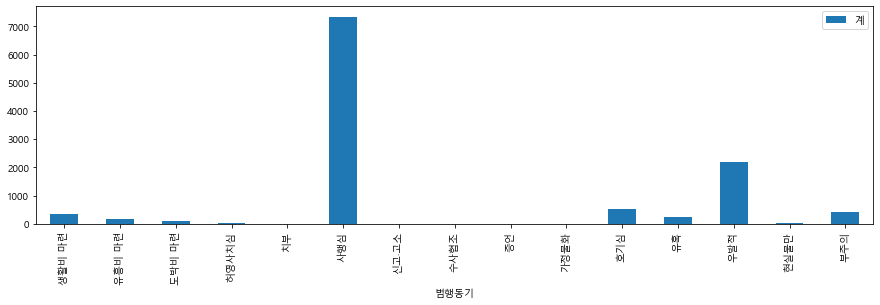

In [90]:
df_all_a6 = df_criminal_m[df_criminal_m['중분류']=='풍속범죄'] 
df_all_a6['계'] = df_all_a6['계'] - df_all6['계']
df_all_a6.set_index('범행동기').plot.bar(figsize=(15,4))

**풍속범죄**의 경우 사행심, 우발적, 호기심 순서로 높음

<ipython-input-91-13738f7b03f1>:2: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  df_all_a7['계'] = df_all_a7['계'] - df_all7['계']


<AxesSubplot:xlabel='범행동기'>

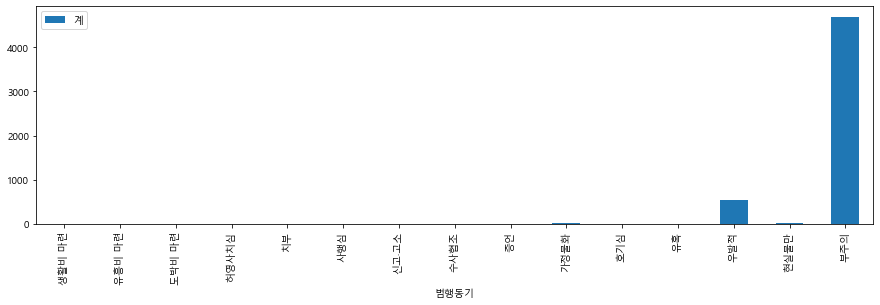

In [91]:
df_all_a7 = df_criminal_m[df_criminal_m['중분류']=='과실범죄'] 
df_all_a7['계'] = df_all_a7['계'] - df_all7['계']
df_all_a7.set_index('범행동기').plot.bar(figsize=(15,4))

In [92]:
df_all_a7.sort_values(by='계', ascending=False).groupby('범행동기').head()

,중분류,범행동기,계
126,과실범죄,부주의,4692
110,과실범죄,우발적,544
86,과실범죄,가정불화,21
118,과실범죄,현실불만,10
14,과실범죄,생활비 마련,2
22,과실범죄,유흥비 마련,0
30,과실범죄,도박비 마련,0
38,과실범죄,허영사치심,0
46,과실범죄,치부,0
54,과실범죄,사행심,0


**과실범죄**의 경우 부주의, 우발적, 가정불화 순서로 높음

<ipython-input-93-a2a9d8cd6282>:2: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  df_all_a8['계'] = df_all_a8['계'] - df_all8['계']


<AxesSubplot:xlabel='범행동기'>

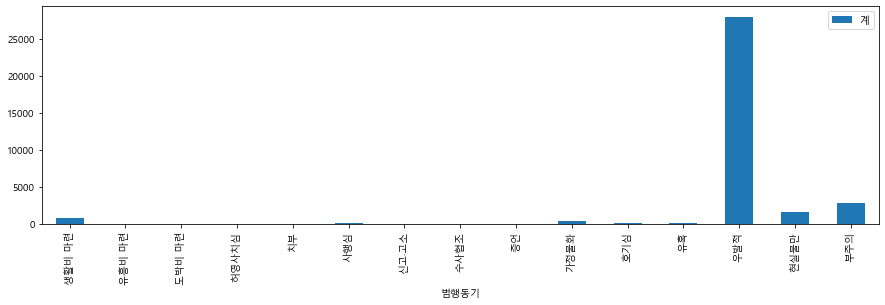

In [93]:
df_all_a8 = df_criminal_m[df_criminal_m['중분류']=='기타형법범죄'] 
df_all_a8['계'] = df_all_a8['계'] - df_all8['계']
df_all_a8.set_index('범행동기').plot.bar(figsize=(15,4))

**기타형법범죄**의 경우 우발적, 부주의, 현실불만 순서로 높음

In [94]:
df_criminal_m

,중분류,범행동기,계
8,재산범죄,생활비 마련,30679
9,강력범죄(흉악),생활비 마련,263
10,강력범죄(폭력),생활비 마련,441
11,위조범죄,생활비 마련,345
12,공무원범죄,생활비 마련,19
...,...,...,...
123,위조범죄,부주의,712
124,공무원범죄,부주의,164
125,풍속범죄,부주의,440
126,과실범죄,부주의,4745


In [95]:
df_young_criminal_m

,중분류,범행동기,계
8,재산범죄,생활비 마련,1969
9,강력범죄(흉악),생활비 마련,31
10,강력범죄(폭력),생활비 마련,72
11,위조범죄,생활비 마련,9
12,공무원범죄,생활비 마련,0
...,...,...,...
123,위조범죄,부주의,57
124,공무원범죄,부주의,0
125,풍속범죄,부주의,3
126,과실범죄,부주의,53


In [96]:
df_criminal_m['계'] = df_criminal_m['계']-df_young_criminal_m['계']

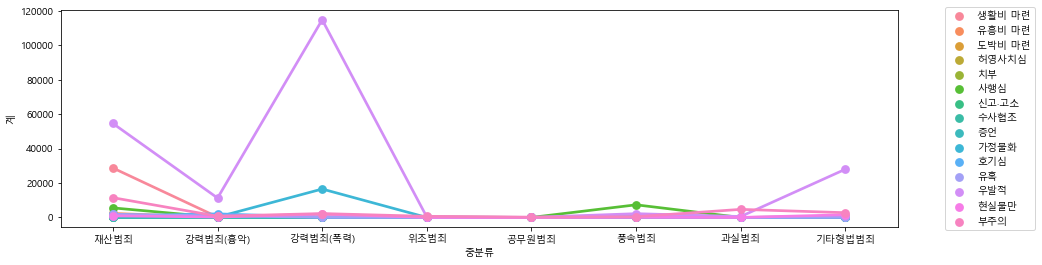

In [97]:
plt.figure(figsize=(15,4))
sns.pointplot(data=df_criminal_m, x='중분류',y='계', hue='범행동기')

plt.legend(loc='center right', bbox_to_anchor=(1.17, 0.5), ncol=1)

## 재산범죄와 강력범죄 소분류별 분석

In [98]:
df_criminal

,중분류,소분류,생활비 마련,유흥비 마련,도박비 마련,허영사치심,치부,사행심,신고·고소,수사협조,증언,가정불화,호기심,유혹,우발적,현실불만,부주의
5,재산범죄,재산범죄의 계[입력치],"30,679","3,214","1,650",243,435,"6,059",8,1,0,"1,797","2,047","2,105","58,050",968,"11,702"
6,재산범죄,배임,176,5,7,2,8,45,0,0,0,0,3,14,62,1,214
7,재산범죄,사기,"20,571","1,899","1,407",140,341,"3,723",6,1,0,28,291,608,"5,987",136,"6,019"
8,재산범죄,손괴,11,2,2,1,2,28,2,0,0,"1,732",57,10,"17,534",625,934
9,재산범죄,장물,168,10,2,1,1,48,0,0,0,0,6,14,171,1,285
10,재산범죄,절도,"8,280","1,190",156,85,36,"1,730",0,0,0,29,"1,440","1,254","29,734",185,"3,127"
11,재산범죄,횡령,"1,473",108,76,14,47,485,0,0,0,8,250,205,"4,562",20,"1,123"
12,강력범죄(흉악),강력범죄(흉악)의 계[입력치],263,74,13,1,13,86,4,1,0,224,"2,711",995,"12,280",254,778
13,강력범죄(흉악),강도,217,64,12,0,0,22,1,0,0,2,5,13,241,11,4
14,강력범죄(흉악),방화,2,0,0,0,0,0,0,0,0,69,23,2,631,109,18


### 재산범죄

In [99]:
df_criminal_total_pro2 = df_criminal[df_criminal['중분류']=='재산범죄'].copy()
df_criminal_total_pro2 = df_criminal_total_pro2[df_criminal_total_pro2['소분류']!='재산범죄의 계[입력치]']
df_criminal_total_pro2 = df_criminal_total_pro2.drop(['중분류'], axis='columns')
df_criminal_total_pro2 = df_criminal_total_pro2.melt(id_vars='소분류')
df_criminal_total_pro2 = df_criminal_total_pro2.rename(columns={'variable':'범행동기', 'value':'계'})

In [100]:
df_criminal_total_pro2

,소분류,범행동기,계
0,배임,생활비 마련,176
1,사기,생활비 마련,"20,571"
2,손괴,생활비 마련,11
3,장물,생활비 마련,168
4,절도,생활비 마련,"8,280"
...,...,...,...
85,사기,부주의,"6,019"
86,손괴,부주의,934
87,장물,부주의,285
88,절도,부주의,"3,127"


In [101]:
df_criminal_total_pro2['계'] = df_criminal_total_pro2['계'].str.replace(',','')
df_criminal_total_pro2['계'] = df_criminal_total_pro2['계'].astype(int)

In [102]:
df_criminal_total_pro2['계'] = df_criminal_total_pro2['계'] - df_criminal_total_pro['계']

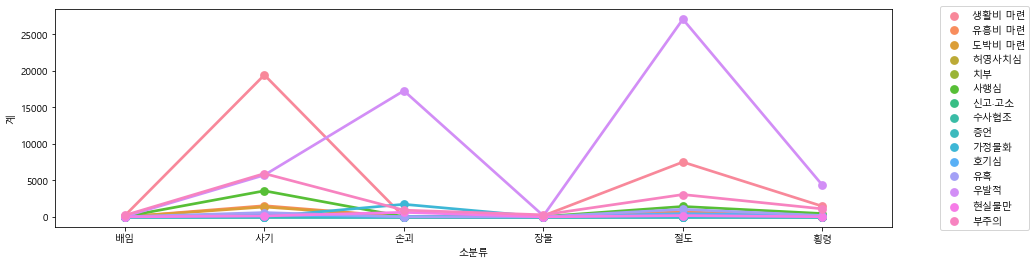

In [103]:
plt.figure(figsize=(15,4))
sns.pointplot(data=df_criminal_total_pro2, x='소분류',y='계', hue='범행동기')

plt.legend(loc='center right', bbox_to_anchor=(1.17, 0.5), ncol=1)

**재산범죄**의 소분류 중 사기는 생활비 마련, 손괴와 절도, 횡령은 우발적이 가장 높음

### 강력범죄(흉악)

In [104]:
df_criminal_total_bru2 = df_criminal[df_criminal['중분류']=='강력범죄(흉악)'].copy()
df_criminal_total_bru2 = df_criminal_total_bru2[df_criminal_total_bru2['소분류']!='강력범죄(흉악)의 계[입력치]']
df_criminal_total_bru2 = df_criminal_total_bru2.drop(['중분류'], axis='columns')
df_criminal_total_bru2 = df_criminal_total_bru2.melt(id_vars='소분류')
df_criminal_total_bru2 = df_criminal_total_bru2.rename(columns={'variable':'범행동기', 'value':'계'})

In [105]:
df_criminal_total_bru2['계'] = df_criminal_total_bru2['계'].str.replace(',','')
df_criminal_total_bru2['계'] = df_criminal_total_bru2['계'].astype(int)

In [106]:
df_criminal_total_bru2['계'] = df_criminal_total_bru2['계'] - df_criminal_total_bru['계']

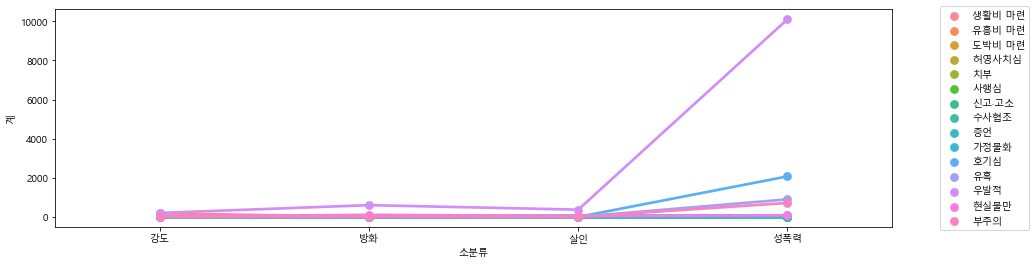

In [107]:
plt.figure(figsize=(15,4))
sns.pointplot(data=df_criminal_total_bru2, x='소분류',y='계', hue='범행동기')

plt.legend(loc='center right', bbox_to_anchor=(1.17, 0.5), ncol=1)

**강력범죄(흉악)**의 소분류 중 성폭력이 가장 많이 발생하며 대부분이 우발적으로 발생

### 강력범죄(폭력)

In [108]:
df_criminal_total_vio2 = df_criminal[df_criminal['중분류']=='강력범죄(폭력)'].copy()
df_criminal_total_vio2 = df_criminal_total_vio2[df_criminal_total_vio2['소분류']!='강력범죄(폭력)의 계[입력치]']
df_criminal_total_vio2 = df_criminal_total_vio2.drop(['중분류'], axis='columns')
df_criminal_total_vio2 = df_criminal_total_vio2.melt(id_vars='소분류')
df_criminal_total_vio2 = df_criminal_total_vio2.rename(columns={'variable':'범행동기', 'value':'계'})

In [109]:
df_criminal_total_vio2['계'] = df_criminal_total_vio2['계'].str.replace(',','')
df_criminal_total_vio2['계'] = df_criminal_total_vio2['계'].astype(int)

In [110]:
df_criminal_total_vio2['계'] = df_criminal_total_vio2['계'] - df_criminal_total_vio['계']

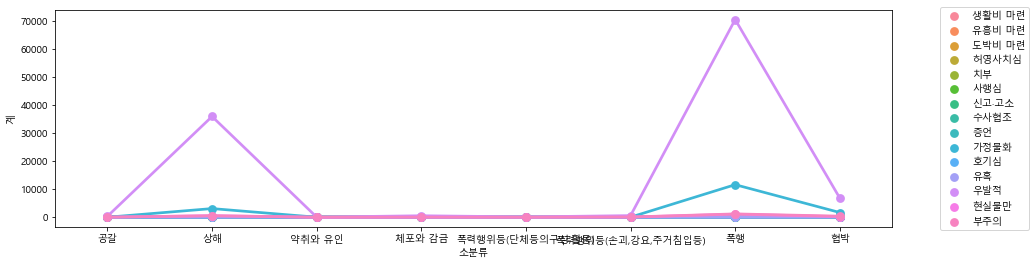

In [111]:
plt.figure(figsize=(15,4))
sns.pointplot(data=df_criminal_total_vio2, x='소분류',y='계', hue='범행동기')

plt.legend(loc='center right', bbox_to_anchor=(1.17, 0.5), ncol=1)

**강력범죄(폭력)**의 소분류 중 상해와 폭행이 가장 많이 발생하며 대부분의 이유가 우발적으로 발생

# 일반범죄자와 소년범죄자 비교

### 전체 범행동기

In [7]:
df_young_data = pd.read_csv('Data/06_소년 범죄자와 일반 범죄자의 범행 동기 차이 분석_김유민_1.csv', encoding='cp949')
df_young_data.head()

,No,자료시점,분류,분류.1,분류.2,계,계.1,계.2,계.3,계.4,...,계.12,계.13,계.14,계.15,계.16,계.17,계.18,계.19,계.20,계.21
0,No,자료시점,분류,분류,분류,계,이욕(소계),이욕(소계),이욕(소계),이욕(소계),...,보복(소계),보복(소계),가정불화,호기심,유혹,우발적,현실불만,부주의,기타,미상
1,No,자료시점,분류,분류,분류,계,이욕(소계),생활비마련,유흥비마련,도박비마련,...,증언,기타,가정불화,호기심,유혹,우발적,현실불만,부주의,기타,미상
2,No,자료시점,분류,분류,분류,원자료,원자료,원자료,원자료,원자료,...,원자료,원자료,원자료,원자료,원자료,원자료,원자료,원자료,원자료,원자료
3,1,2018년,계,계[입력치],계[입력치],"66,142","6,624","2,200","1,064",62,...,0,4,181,"2,941",513,"13,287",246,"2,639","10,662","28,362"
4,2,2018년,형법범,형법범계[입력치],형법범계[입력치],"54,205","6,275","2,082","1,011",62,...,0,4,175,"2,154",410,"12,409",232,590,"8,078","23,269"


In [32]:
df_young_data = df_young_data.rename(columns={'분류':'대분류', '분류.1':'중분류','분류.2':'소분류','계.2':'생활비 마련','계.3':'유흥비 마련','계.4':'도박비 마련','계.5':'허영사치심','계.6':'치부',
                                   '계.8':'사행심','계.10':'신고·고소','계.11':'수사협조','계.12':'증언','계.14':'가정불화','계.15':'호기심','계.16':'유혹','계.17':'우발적','계.18':'현실불만','계.19':'부주의'})
df_young_data.head(10)

,No,자료시점,대분류,중분류,소분류,계,계.1,생활비 마련,유흥비 마련,도박비 마련,...,증언,계.13,가정불화,호기심,유혹,우발적,현실불만,부주의,계.20,계.21
0,No,자료시점,분류,분류,분류,계,이욕(소계),이욕(소계),이욕(소계),이욕(소계),...,보복(소계),보복(소계),가정불화,호기심,유혹,우발적,현실불만,부주의,기타,미상
1,No,자료시점,분류,분류,분류,계,이욕(소계),생활비마련,유흥비마련,도박비마련,...,증언,기타,가정불화,호기심,유혹,우발적,현실불만,부주의,기타,미상
2,No,자료시점,분류,분류,분류,원자료,원자료,원자료,원자료,원자료,...,원자료,원자료,원자료,원자료,원자료,원자료,원자료,원자료,원자료,원자료
3,1,2018년,계,계[입력치],계[입력치],"66,142","6,624","2,200","1,064",62,...,0,4,181,"2,941",513,"13,287",246,"2,639","10,662","28,362"
4,2,2018년,형법범,형법범계[입력치],형법범계[입력치],"54,205","6,275","2,082","1,011",62,...,0,4,175,"2,154",410,"12,409",232,590,"8,078","23,269"
5,3,2018년,형법범,재산범죄,재산범죄의 계[입력치],"26,497","5,645","1,969",879,58,...,0,0,23,"1,191",274,"3,481",31,223,"3,207","11,907"
6,4,2018년,형법범,재산범죄,배임,2,0,0,0,0,...,0,0,0,0,0,0,0,0,1,1
7,5,2018년,형법범,재산범죄,사기,"6,968","2,476","1,154",375,55,...,0,0,4,61,24,271,9,95,"1,093","2,771"
8,6,2018년,형법범,재산범죄,손괴,940,8,1,1,0,...,0,0,14,26,0,280,7,19,115,470
9,7,2018년,형법범,재산범죄,장물,290,80,13,1,0,...,0,0,0,4,3,22,0,6,56,111


In [9]:
df_young = df_young_data.drop(['No','자료시점','중분류','소분류','계','계.1','계.7','계.9','계.13','계.20','계.21'], axis='columns')
df_young.head()

,대분류,생활비 마련,유흥비 마련,도박비 마련,허영사치심,치부,사행심,신고·고소,수사협조,증언,가정불화,호기심,유혹,우발적,현실불만,부주의
0,분류,이욕(소계),이욕(소계),이욕(소계),이욕(소계),이욕(소계),사행심,보복(소계),보복(소계),보복(소계),가정불화,호기심,유혹,우발적,현실불만,부주의
1,분류,생활비마련,유흥비마련,도박비마련,허영사치심,치부,사행심,신고·고소,수사협조,증언,가정불화,호기심,유혹,우발적,현실불만,부주의
2,분류,원자료,원자료,원자료,원자료,원자료,원자료,원자료,원자료,원자료,원자료,원자료,원자료,원자료,원자료,원자료
3,계,"2,200","1,064",62,55,7,681,1,1,0,181,"2,941",513,"13,287",246,"2,639"
4,형법범,"2,082","1,011",62,50,7,607,1,1,0,175,"2,154",410,"12,409",232,590


In [10]:
df_young = df_young[df_young['대분류']=='계']
df_young.head()

,대분류,생활비 마련,유흥비 마련,도박비 마련,허영사치심,치부,사행심,신고·고소,수사협조,증언,가정불화,호기심,유혹,우발적,현실불만,부주의
3,계,"2,200","1,064",62,55,7,681,1,1,0,181,"2,941",513,"13,287",246,"2,639"


In [11]:
df_young = df_young.drop(['대분류'], axis='columns')
df_young.head()

,생활비 마련,유흥비 마련,도박비 마련,허영사치심,치부,사행심,신고·고소,수사협조,증언,가정불화,호기심,유혹,우발적,현실불만,부주의
3,"2,200","1,064",62,55,7,681,1,1,0,181,"2,941",513,"13,287",246,"2,639"


In [12]:
df_adult_data = pd.read_csv('Data/06_소년 범죄자와 일반 범죄자의 범행 동기 차이 분석_김유민_2.csv', encoding='cp949')
df_adult_data.head()

,No,자료시점,분류,분류.1,분류.2,계,계.1,계.2,계.3,계.4,...,계.12,계.13,계.14,계.15,계.16,계.17,계.18,계.19,계.20,계.21
0,No,자료시점,분류,분류,분류,계,이욕(소계),이욕(소계),이욕(소계),이욕(소계),...,보복(소계),보복(소계),가정불화,호기심,유혹,우발적,현실불만,부주의,기타,미상
1,No,자료시점,분류,분류,분류,계,이욕(소계),생활비마련,유흥비마련,도박비마련,...,증언,기타,가정불화,호기심,유혹,우발적,현실불만,부주의,기타,미상
2,No,자료시점,분류,분류,분류,원자료,원자료,원자료,원자료,원자료,...,원자료,원자료,원자료,원자료,원자료,원자료,원자료,원자료,원자료,원자료
3,1,2018년,계,계[입력치],계[입력치],"1,749,459","139,967","52,381","3,935","1,890",...,14,191,"20,340","9,418","6,848","262,269","6,004","198,468","395,225","693,485"
4,2,2018년,형법범,형법범계[입력치],형법범계[입력치],"963,276","92,752","32,861","3,727","1,850",...,12,164,"19,057","5,940","3,660","224,084","4,983","23,778","181,080","393,488"


In [13]:
df_adult_data = df_adult_data.rename(columns={'분류':'대분류', '분류.1':'중분류','분류.2':'소분류','계.2':'생활비 마련','계.3':'유흥비 마련','계.4':'도박비 마련','계.5':'허영사치심','계.6':'치부',
                                   '계.8':'사행심','계.10':'신고·고소','계.11':'수사협조','계.12':'증언','계.14':'가정불화','계.15':'호기심','계.16':'유혹','계.17':'우발적','계.18':'현실불만','계.19':'부주의'})
df_adult_data.head()

,No,자료시점,대분류,중분류,소분류,계,계.1,생활비 마련,유흥비 마련,도박비 마련,...,증언,계.13,가정불화,호기심,유혹,우발적,현실불만,부주의,계.20,계.21
0,No,자료시점,분류,분류,분류,계,이욕(소계),이욕(소계),이욕(소계),이욕(소계),...,보복(소계),보복(소계),가정불화,호기심,유혹,우발적,현실불만,부주의,기타,미상
1,No,자료시점,분류,분류,분류,계,이욕(소계),생활비마련,유흥비마련,도박비마련,...,증언,기타,가정불화,호기심,유혹,우발적,현실불만,부주의,기타,미상
2,No,자료시점,분류,분류,분류,원자료,원자료,원자료,원자료,원자료,...,원자료,원자료,원자료,원자료,원자료,원자료,원자료,원자료,원자료,원자료
3,1,2018년,계,계[입력치],계[입력치],"1,749,459","139,967","52,381","3,935","1,890",...,14,191,"20,340","9,418","6,848","262,269","6,004","198,468","395,225","693,485"
4,2,2018년,형법범,형법범계[입력치],형법범계[입력치],"963,276","92,752","32,861","3,727","1,850",...,12,164,"19,057","5,940","3,660","224,084","4,983","23,778","181,080","393,488"


In [14]:
df_adult = df_adult_data.drop(['No','자료시점','중분류','소분류','계','계.1','계.7','계.9','계.13','계.20','계.21'], axis='columns')
df_adult.head()

,대분류,생활비 마련,유흥비 마련,도박비 마련,허영사치심,치부,사행심,신고·고소,수사협조,증언,가정불화,호기심,유혹,우발적,현실불만,부주의
0,분류,이욕(소계),이욕(소계),이욕(소계),이욕(소계),이욕(소계),사행심,보복(소계),보복(소계),보복(소계),가정불화,호기심,유혹,우발적,현실불만,부주의
1,분류,생활비마련,유흥비마련,도박비마련,허영사치심,치부,사행심,신고·고소,수사협조,증언,가정불화,호기심,유혹,우발적,현실불만,부주의
2,분류,원자료,원자료,원자료,원자료,원자료,원자료,원자료,원자료,원자료,원자료,원자료,원자료,원자료,원자료,원자료
3,계,"52,381","3,935","1,890",367,"1,274","17,074",148,8,14,"20,340","9,418","6,848","262,269","6,004","198,468"
4,형법범,"32,861","3,727","1,850",297,530,"14,154",117,7,12,"19,057","5,940","3,660","224,084","4,983","23,778"


In [15]:
df_adult = df_adult[df_adult['대분류']=='계']
df_adult.head()

,대분류,생활비 마련,유흥비 마련,도박비 마련,허영사치심,치부,사행심,신고·고소,수사협조,증언,가정불화,호기심,유혹,우발적,현실불만,부주의
3,계,"52,381","3,935","1,890",367,"1,274","17,074",148,8,14,"20,340","9,418","6,848","262,269","6,004","198,468"


In [16]:
df_adult = df_adult.drop(['대분류'], axis='columns')
df_adult.head()

,생활비 마련,유흥비 마련,도박비 마련,허영사치심,치부,사행심,신고·고소,수사협조,증언,가정불화,호기심,유혹,우발적,현실불만,부주의
3,"52,381","3,935","1,890",367,"1,274","17,074",148,8,14,"20,340","9,418","6,848","262,269","6,004","198,468"


In [17]:
df_total = pd.concat([df_young, df_adult], axis = 0)

In [18]:
df_total

,생활비 마련,유흥비 마련,도박비 마련,허영사치심,치부,사행심,신고·고소,수사협조,증언,가정불화,호기심,유혹,우발적,현실불만,부주의
3,"2,200","1,064",62,55,7,681,1,1,0,181,"2,941",513,"13,287",246,"2,639"
3,"52,381","3,935","1,890",367,"1,274","17,074",148,8,14,"20,340","9,418","6,848","262,269","6,004","198,468"


In [19]:
df_total.index=['소년', '일반']

In [20]:
df_total.loc['소년']

생활비 마련     2,200
유흥비 마련     1,064
도박비 마련        62
허영사치심         55
치부             7
사행심          681
신고·고소          1
수사협조           1
증언             0
가정불화         181
호기심        2,941
유혹           513
우발적       13,287
현실불만         246
부주의        2,639
Name: 소년, dtype: object

In [21]:
df_total.loc['소년']=df_total.loc['소년'].str.replace(',','')
df_total.loc['소년']=df_total.loc['소년'].astype(int)

In [22]:
df_total.loc['일반']=df_total.loc['일반'].str.replace(',','')
df_total.loc['일반']=df_total.loc['일반'].astype(int)

In [23]:
df_total

,생활비 마련,유흥비 마련,도박비 마련,허영사치심,치부,사행심,신고·고소,수사협조,증언,가정불화,호기심,유혹,우발적,현실불만,부주의
소년,2200,1064,62,55,7,681,1,1,0,181,2941,513,13287,246,2639
일반,52381,3935,1890,367,1274,17074,148,8,14,20340,9418,6848,262269,6004,198468


In [24]:
df_total.loc["성인"] = df_total.apply(lambda c: abs(c["일반"] - c["소년"]), axis=0)

In [25]:
df_total

,생활비 마련,유흥비 마련,도박비 마련,허영사치심,치부,사행심,신고·고소,수사협조,증언,가정불화,호기심,유혹,우발적,현실불만,부주의
소년,2200,1064,62,55,7,681,1,1,0,181,2941,513,13287,246,2639
일반,52381,3935,1890,367,1274,17074,148,8,14,20340,9418,6848,262269,6004,198468
성인,50181,2871,1828,312,1267,16393,147,7,14,20159,6477,6335,248982,5758,195829


In [26]:
df_total.iloc

In [27]:
df_total.loc["성인"]

생활비 마련     50181
유흥비 마련      2871
도박비 마련      1828
허영사치심        312
치부          1267
사행심        16393
신고·고소        147
수사협조           7
증언            14
가정불화       20159
호기심         6477
유혹          6335
우발적       248982
현실불만        5758
부주의       195829
Name: 성인, dtype: object

In [37]:
df_total

,생활비 마련,유흥비 마련,도박비 마련,허영사치심,치부,사행심,신고·고소,수사협조,증언,가정불화,호기심,유혹,우발적,현실불만,부주의
소년,2200,1064,62,55,7,681,1,1,0,181,2941,513,13287,246,2639
일반,52381,3935,1890,367,1274,17074,148,8,14,20340,9418,6848,262269,6004,198468
성인,50181,2871,1828,312,1267,16393,147,7,14,20159,6477,6335,248982,5758,195829
소년 비율,4.058666,1.962919,0.114381,0.101467,0.012914,1.256342,0.001845,0.001845,0.0,0.333918,5.425699,0.946407,24.512499,0.453833,4.868555
성인 비율,8.645368,0.494626,0.314935,0.053753,0.218283,2.824247,0.025326,0.001206,0.002412,3.473067,1.115881,1.091417,42.895538,0.992009,33.738143


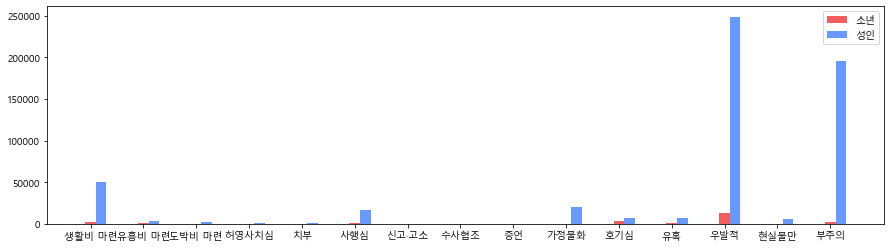

In [30]:
x = np.arange(15)
label = ['생활비 마련','유흥비 마련','도박비 마련','허영사치심','치부','사행심','신고·고소','수사협조','증언','가정불화','호기심','유혹','우발적','현실불만','부주의']
plt.figure(figsize=(15,4))

plt.bar(x-0.0, df_total.loc['소년'],label='소년',width=0.2,color='#F15F5F')
plt.bar(x+0.2, df_total.loc['성인'],label='성인',width=0.2,color='#6799FF')
plt.xticks(x,label)

plt.legend()

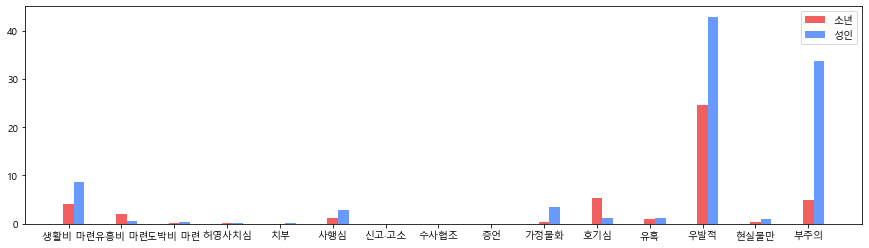

In [39]:
x = np.arange(15)
label = ['생활비 마련','유흥비 마련','도박비 마련','허영사치심','치부','사행심','신고·고소','수사협조','증언','가정불화','호기심','유혹','우발적','현실불만','부주의']
plt.figure(figsize=(15,4))

df_total.loc['소년 비율'] = df_total.loc['소년']/54205*100
df_total.loc['성인 비율'] = df_total.loc['성인']/580438*100

plt.bar(x-0.0, df_total.loc['소년 비율'],label='소년',width=0.2,color='#F15F5F')
plt.bar(x+0.2, df_total.loc['성인 비율'],label='성인',width=0.2,color='#6799FF')
plt.xticks(x,label)

plt.legend()

### 상위 3개 비교

In [41]:
df_young_top = df_young_data[['소분류','우발적','호기심','부주의']]
df_young_top

,소분류,우발적,호기심,부주의
0,분류,우발적,호기심,부주의
1,분류,우발적,호기심,부주의
2,분류,원자료,원자료,원자료
3,계[입력치],"13,287","2,941","2,639"
4,형법범계[입력치],"12,409","2,154",590
...,...,...,...,...
118,풍속영업의규제에관한법률,0,0,0
119,학원의설립운영및과외교습에관한법률,0,0,0
120,예비군법,0,0,0
121,화물자동차운수사업법,0,0,0


In [42]:
df_young_top = df_young_top.loc[[5,12,17,26,31,36,40,44],:]
df_young_top

,소분류,우발적,호기심,부주의
5,재산범죄의 계[입력치],"3,481","1,191",223
12,강력범죄(흉악)의 계[입력치],992,620,41
17,강력범죄(폭력)의 계[입력치],"7,244",90,163
26,위조범죄의 계[입력치],142,166,57
31,공무원범죄의 계[입력치],0,0,0
36,풍속범죄의 계[입력치],35,12,3
40,과실범죄의 계[입력치],15,7,53
44,기타형법범죄의 계[입력치],500,68,50


In [43]:
df_young_top['우발적']=df_young_top['우발적'].str.replace(',','')
df_young_top['호기심']=df_young_top['호기심'].str.replace(',','')
df_young_top['부주의']=df_young_top['부주의'].str.replace(',','')

In [44]:
df_young_top['우발적']=df_young_top['우발적'].astype(int)
df_young_top['호기심']=df_young_top['호기심'].astype(int)
df_young_top['부주의']=df_young_top['부주의'].astype(int)

In [45]:
df_young_top

,소분류,우발적,호기심,부주의
5,재산범죄의 계[입력치],3481,1191,223
12,강력범죄(흉악)의 계[입력치],992,620,41
17,강력범죄(폭력)의 계[입력치],7244,90,163
26,위조범죄의 계[입력치],142,166,57
31,공무원범죄의 계[입력치],0,0,0
36,풍속범죄의 계[입력치],35,12,3
40,과실범죄의 계[입력치],15,7,53
44,기타형법범죄의 계[입력치],500,68,50


In [46]:
df_young_top['소분류'] = df_young_top['소분류'].str.replace('의 계\[입력치\]','')

<ipython-input-46-606de3bb2616>:1: FutureWarning: The default value of regex will change from True to False in a future version.
  df_young_top['소분류'] = df_young_top['소분류'].str.replace('의 계\[입력치\]','')


In [47]:
df_young_top

,소분류,우발적,호기심,부주의
5,재산범죄,3481,1191,223
12,강력범죄(흉악),992,620,41
17,강력범죄(폭력),7244,90,163
26,위조범죄,142,166,57
31,공무원범죄,0,0,0
36,풍속범죄,35,12,3
40,과실범죄,15,7,53
44,기타형법범죄,500,68,50


In [48]:
df_young_top_m = df_young_top.melt(id_vars='소분류')

In [49]:
df_young_top_m = df_young_top_m.rename(columns={'variable':'범행동기', 'value':'계'})
df_young_top_m.head()

,소분류,범행동기,계
0,재산범죄,우발적,3481
1,강력범죄(흉악),우발적,992
2,강력범죄(폭력),우발적,7244
3,위조범죄,우발적,142
4,공무원범죄,우발적,0


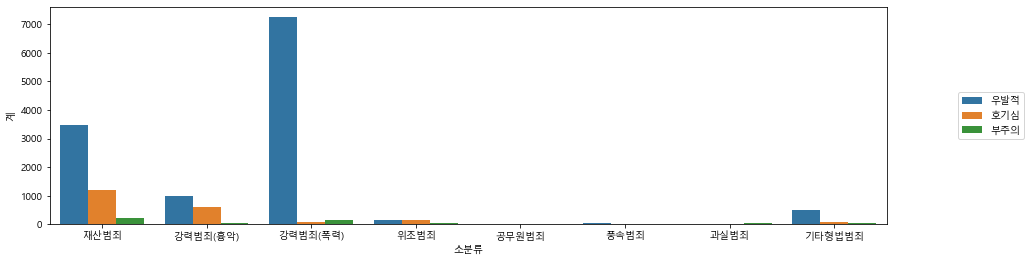

In [50]:
plt.figure(figsize=(15,4))
sns.barplot(data=df_young_top_m, x='소분류',y='계', hue='범행동기')

plt.legend(loc='center right', bbox_to_anchor=(1.17, 0.5), ncol=1)

In [51]:
df_adult_top = df_adult_data[['소분류','우발적','부주의','생활비 마련']]
df_adult_top

,소분류,우발적,부주의,생활비 마련
0,분류,우발적,부주의,이욕(소계)
1,분류,우발적,부주의,생활비마련
2,분류,원자료,원자료,원자료
3,계[입력치],"262,269","198,468","52,381"
4,형법범계[입력치],"224,084","23,778","32,861"
...,...,...,...,...
172,화물자동차운수사업법,36,372,517
173,화재로인한재해보상과보험가입에관한법률,0,0,0
174,화재보험법,NaN,NaN,NaN
175,화학물질관리법,57,14,2


In [52]:
df_adult_top = df_adult_top.loc[[5,12,17,26,31,36,40,44],:]
df_adult_top

,소분류,우발적,부주의,생활비 마련
5,재산범죄의 계[입력치],"58,050","11,702","30,679"
12,강력범죄(흉악)의 계[입력치],"12,280",778,263
17,강력범죄(폭력)의 계[입력치],"122,036","2,426",441
26,위조범죄의 계[입력치],388,712,345
31,공무원범죄의 계[입력치],59,164,19
36,풍속범죄의 계[입력치],"2,230",440,338
40,과실범죄의 계[입력치],559,"4,745",2
44,기타형법범죄의 계[입력치],"28,482","2,811",774


In [53]:
df_adult_top['우발적']=df_adult_top['우발적'].str.replace(',','')
df_adult_top['생활비 마련']=df_adult_top['생활비 마련'].str.replace(',','')
df_adult_top['부주의']=df_adult_top['부주의'].str.replace(',','')

In [54]:
df_adult_top['우발적']=df_adult_top['우발적'].astype(int)
df_adult_top['생활비 마련']=df_adult_top['생활비 마련'].astype(int)
df_adult_top['부주의']=df_adult_top['부주의'].astype(int)

In [55]:
df_adult_top

,소분류,우발적,부주의,생활비 마련
5,재산범죄의 계[입력치],58050,11702,30679
12,강력범죄(흉악)의 계[입력치],12280,778,263
17,강력범죄(폭력)의 계[입력치],122036,2426,441
26,위조범죄의 계[입력치],388,712,345
31,공무원범죄의 계[입력치],59,164,19
36,풍속범죄의 계[입력치],2230,440,338
40,과실범죄의 계[입력치],559,4745,2
44,기타형법범죄의 계[입력치],28482,2811,774


In [56]:
df_adult_top['소분류'] = df_adult_top['소분류'].str.replace('의 계\[입력치\]','')

<ipython-input-56-2424c31099e7>:1: FutureWarning: The default value of regex will change from True to False in a future version.
  df_adult_top['소분류'] = df_adult_top['소분류'].str.replace('의 계\[입력치\]','')


In [57]:
df_adult_top

,소분류,우발적,부주의,생활비 마련
5,재산범죄,58050,11702,30679
12,강력범죄(흉악),12280,778,263
17,강력범죄(폭력),122036,2426,441
26,위조범죄,388,712,345
31,공무원범죄,59,164,19
36,풍속범죄,2230,440,338
40,과실범죄,559,4745,2
44,기타형법범죄,28482,2811,774


In [58]:
df_adult_top_m = df_adult_top.melt(id_vars='소분류')

In [59]:
df_adult_top_m = df_adult_top_m.rename(columns={'variable':'범행동기', 'value':'계'})
df_adult_top_m.head()

,소분류,범행동기,계
0,재산범죄,우발적,58050
1,강력범죄(흉악),우발적,12280
2,강력범죄(폭력),우발적,122036
3,위조범죄,우발적,388
4,공무원범죄,우발적,59


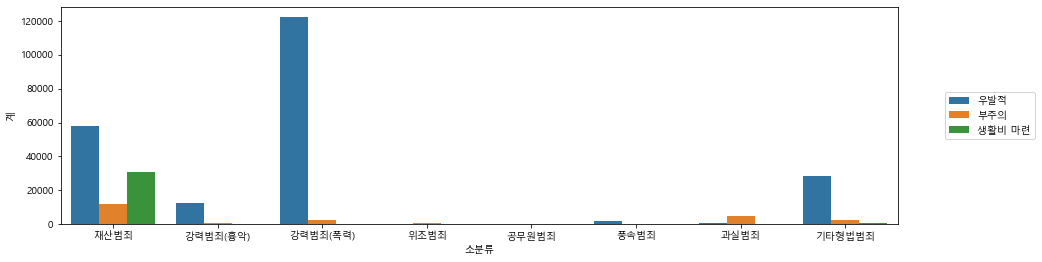

In [60]:
plt.figure(figsize=(15,4))
sns.barplot(data=df_adult_top_m, x='소분류',y='계', hue='범행동기')

plt.legend(loc='center right', bbox_to_anchor=(1.17, 0.5), ncol=1)

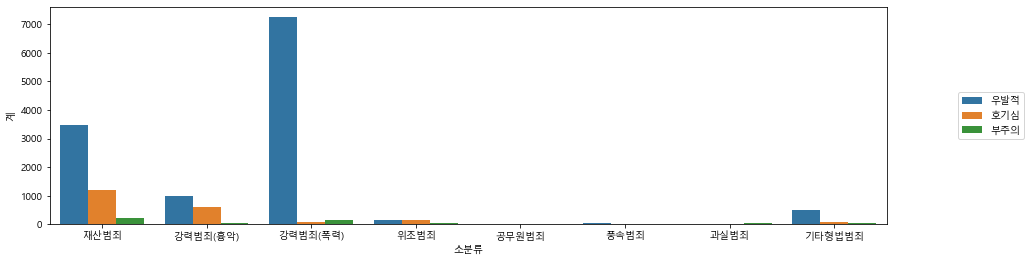

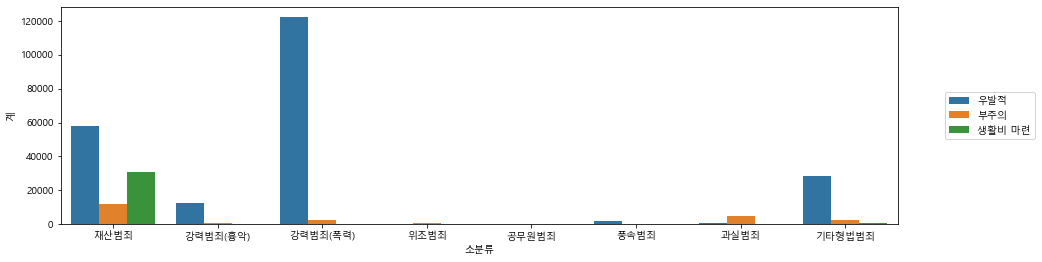

In [61]:
plt.figure(figsize=(15,4))
sns.barplot(data=df_young_top_m, x='소분류',y='계', hue='범행동기')

plt.legend(loc='center right', bbox_to_anchor=(1.17, 0.5), ncol=1)

plt.figure(figsize=(15,4))
sns.barplot(data=df_adult_top_m, x='소분류',y='계', hue='범행동기')

plt.legend(loc='center right', bbox_to_anchor=(1.17, 0.5), ncol=1)